In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import cv2
import os
import json

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms, models
from PIL import Image, ImageFile, ImageDraw

In [2]:
ROOT_PATH = ".\\iwildcam_rs_npy\\"

In [3]:
locations = [f for f in os.listdir(ROOT_PATH)]
print(str(locations[:5]) + " ...")

['iwc_000', 'iwc_001', 'iwc_002', 'iwc_003', 'iwc_004'] ...


In [4]:
df_multispec = pd.DataFrame( columns =['loc', 'ultrablue', 'blue', 'green', 'red', 'infrared', 'shortwave_infrared_1', 'shortwave_infrared_2', 'brightness_temp_1', 'brightness_temp_2']) 
#spectral_array = [1,0,0,0,0,0,0,0,0]
#spec_toAppend = pd. Series(spectral_array, index = df_multispec.columns)
#df_multispec = df_multispec.append(spec_toAppend, ignore_index=True)
#df_multispec.head()

In [5]:
for loc_idx, loc in enumerate(locations): # for each location
    spectral_array = [0, 0,0,0,0,0,0,0,0,0]
    loc_dir = ROOT_PATH + loc
    multispec_files = [f for f in os.listdir(loc_dir)]

    multispec_files = multispec_files[0:len(multispec_files):3] #every third file is multi spec starting with 0
    print(loc)
    print(loc_dir)
    #print(len(multispec_files))

    #print(loc_dir , str(len(multispec)))
    for multispec_file in multispec_files: # for each image
        multispec = np.load(loc_dir + "\\" + multispec_file)
        
        for i in range(len(multispec[0:200][0:200][0:9])): #get sum of averages across each photo
            avg_spec = multispec[0:200][0:200][i].mean()
            spectral_array[i+1] += avg_spec
            
    for i in range(len(spectral_array)):# get average across all photos
        spectral_array[i] = spectral_array[i]/len(multispec_files)

    spectral_array[0] = loc_idx
    spec_toAppend = pd. Series(spectral_array, index = df_multispec.columns)
    df_multispec = df_multispec.append(spec_toAppend, ignore_index=True)
    print(df_multispec)


iwc_000
.\iwildcam_rs_npy\iwc_000
   loc    ultrablue         blue        green          red    infrared  \
0  0.0  3724.051293  3728.930008  3728.828906  3736.341739  3779.63307   

   shortwave_infrared_1  shortwave_infrared_2  brightness_temp_1  \
0           3773.268609           3782.265318        3802.074919   

   brightness_temp_2  
0        3798.815157  
iwc_001
.\iwildcam_rs_npy\iwc_001
   loc    ultrablue         blue        green          red     infrared  \
0  0.0  3724.051293  3728.930008  3728.828906  3736.341739  3779.633070   
1  1.0  2233.786455  2243.534444  2254.122052  2261.475669  2275.626096   

   shortwave_infrared_1  shortwave_infrared_2  brightness_temp_1  \
0           3773.268609           3782.265318        3802.074919   
1           2268.432423           2251.734652        2258.897668   

   brightness_temp_2  
0        3798.815157  
1        2262.460249  
iwc_002
.\iwildcam_rs_npy\iwc_002
   loc    ultrablue         blue        green          red     inf

     loc    ultrablue         blue        green          red     infrared  \
0    0.0  3724.051293  3728.930008  3728.828906  3736.341739  3779.633070   
1    1.0  2233.786455  2243.534444  2254.122052  2261.475669  2275.626096   
2    2.0  2787.182411  2781.482500  2819.692301  2811.260294  2795.475047   
3    3.0  2597.677414  2589.242023  2573.774125  2589.531949  2595.800914   
4    4.0  1974.537276  1976.955020  1958.974081  1975.615634  1975.451662   
5    5.0  2593.663808  2605.922247  2607.021860  2597.967134  2622.397195   
6    6.0  1741.833837  1729.397470  1748.742902  1742.313796  1757.362623   
7    7.0  3417.176438  3420.670441  3419.073588  3423.650937  3428.862553   
8    8.0  2497.943218  2495.453764  2489.125573  2504.283583  2503.317186   
9    9.0  2141.679459  2164.181040  2159.118291  2127.607479  2198.214402   
10  10.0  2415.672998  2443.279045  2443.425559  2446.853417  2470.462116   
11  11.0  2533.937642  2544.210221  2529.176774  2552.731823  2555.605869   

     loc    ultrablue         blue        green          red     infrared  \
0    0.0  3724.051293  3728.930008  3728.828906  3736.341739  3779.633070   
1    1.0  2233.786455  2243.534444  2254.122052  2261.475669  2275.626096   
2    2.0  2787.182411  2781.482500  2819.692301  2811.260294  2795.475047   
3    3.0  2597.677414  2589.242023  2573.774125  2589.531949  2595.800914   
4    4.0  1974.537276  1976.955020  1958.974081  1975.615634  1975.451662   
5    5.0  2593.663808  2605.922247  2607.021860  2597.967134  2622.397195   
6    6.0  1741.833837  1729.397470  1748.742902  1742.313796  1757.362623   
7    7.0  3417.176438  3420.670441  3419.073588  3423.650937  3428.862553   
8    8.0  2497.943218  2495.453764  2489.125573  2504.283583  2503.317186   
9    9.0  2141.679459  2164.181040  2159.118291  2127.607479  2198.214402   
10  10.0  2415.672998  2443.279045  2443.425559  2446.853417  2470.462116   
11  11.0  2533.937642  2544.210221  2529.176774  2552.731823  2555.605869   

     loc    ultrablue         blue        green          red     infrared  \
0    0.0  3724.051293  3728.930008  3728.828906  3736.341739  3779.633070   
1    1.0  2233.786455  2243.534444  2254.122052  2261.475669  2275.626096   
2    2.0  2787.182411  2781.482500  2819.692301  2811.260294  2795.475047   
3    3.0  2597.677414  2589.242023  2573.774125  2589.531949  2595.800914   
4    4.0  1974.537276  1976.955020  1958.974081  1975.615634  1975.451662   
5    5.0  2593.663808  2605.922247  2607.021860  2597.967134  2622.397195   
6    6.0  1741.833837  1729.397470  1748.742902  1742.313796  1757.362623   
7    7.0  3417.176438  3420.670441  3419.073588  3423.650937  3428.862553   
8    8.0  2497.943218  2495.453764  2489.125573  2504.283583  2503.317186   
9    9.0  2141.679459  2164.181040  2159.118291  2127.607479  2198.214402   
10  10.0  2415.672998  2443.279045  2443.425559  2446.853417  2470.462116   
11  11.0  2533.937642  2544.210221  2529.176774  2552.731823  2555.605869   

23        2129.903561  
iwc_024
.\iwildcam_rs_npy\iwc_024
     loc    ultrablue         blue        green          red     infrared  \
0    0.0  3724.051293  3728.930008  3728.828906  3736.341739  3779.633070   
1    1.0  2233.786455  2243.534444  2254.122052  2261.475669  2275.626096   
2    2.0  2787.182411  2781.482500  2819.692301  2811.260294  2795.475047   
3    3.0  2597.677414  2589.242023  2573.774125  2589.531949  2595.800914   
4    4.0  1974.537276  1976.955020  1958.974081  1975.615634  1975.451662   
5    5.0  2593.663808  2605.922247  2607.021860  2597.967134  2622.397195   
6    6.0  1741.833837  1729.397470  1748.742902  1742.313796  1757.362623   
7    7.0  3417.176438  3420.670441  3419.073588  3423.650937  3428.862553   
8    8.0  2497.943218  2495.453764  2489.125573  2504.283583  2503.317186   
9    9.0  2141.679459  2164.181040  2159.118291  2127.607479  2198.214402   
10  10.0  2415.672998  2443.279045  2443.425559  2446.853417  2470.462116   
11  11.0  2533.937

     loc    ultrablue         blue        green          red     infrared  \
0    0.0  3724.051293  3728.930008  3728.828906  3736.341739  3779.633070   
1    1.0  2233.786455  2243.534444  2254.122052  2261.475669  2275.626096   
2    2.0  2787.182411  2781.482500  2819.692301  2811.260294  2795.475047   
3    3.0  2597.677414  2589.242023  2573.774125  2589.531949  2595.800914   
4    4.0  1974.537276  1976.955020  1958.974081  1975.615634  1975.451662   
5    5.0  2593.663808  2605.922247  2607.021860  2597.967134  2622.397195   
6    6.0  1741.833837  1729.397470  1748.742902  1742.313796  1757.362623   
7    7.0  3417.176438  3420.670441  3419.073588  3423.650937  3428.862553   
8    8.0  2497.943218  2495.453764  2489.125573  2504.283583  2503.317186   
9    9.0  2141.679459  2164.181040  2159.118291  2127.607479  2198.214402   
10  10.0  2415.672998  2443.279045  2443.425559  2446.853417  2470.462116   
11  11.0  2533.937642  2544.210221  2529.176774  2552.731823  2555.605869   

     loc    ultrablue         blue        green          red     infrared  \
0    0.0  3724.051293  3728.930008  3728.828906  3736.341739  3779.633070   
1    1.0  2233.786455  2243.534444  2254.122052  2261.475669  2275.626096   
2    2.0  2787.182411  2781.482500  2819.692301  2811.260294  2795.475047   
3    3.0  2597.677414  2589.242023  2573.774125  2589.531949  2595.800914   
4    4.0  1974.537276  1976.955020  1958.974081  1975.615634  1975.451662   
5    5.0  2593.663808  2605.922247  2607.021860  2597.967134  2622.397195   
6    6.0  1741.833837  1729.397470  1748.742902  1742.313796  1757.362623   
7    7.0  3417.176438  3420.670441  3419.073588  3423.650937  3428.862553   
8    8.0  2497.943218  2495.453764  2489.125573  2504.283583  2503.317186   
9    9.0  2141.679459  2164.181040  2159.118291  2127.607479  2198.214402   
10  10.0  2415.672998  2443.279045  2443.425559  2446.853417  2470.462116   
11  11.0  2533.937642  2544.210221  2529.176774  2552.731823  2555.605869   

32        2211.694875  
iwc_033
.\iwildcam_rs_npy\iwc_033
     loc    ultrablue         blue        green          red     infrared  \
0    0.0  3724.051293  3728.930008  3728.828906  3736.341739  3779.633070   
1    1.0  2233.786455  2243.534444  2254.122052  2261.475669  2275.626096   
2    2.0  2787.182411  2781.482500  2819.692301  2811.260294  2795.475047   
3    3.0  2597.677414  2589.242023  2573.774125  2589.531949  2595.800914   
4    4.0  1974.537276  1976.955020  1958.974081  1975.615634  1975.451662   
5    5.0  2593.663808  2605.922247  2607.021860  2597.967134  2622.397195   
6    6.0  1741.833837  1729.397470  1748.742902  1742.313796  1757.362623   
7    7.0  3417.176438  3420.670441  3419.073588  3423.650937  3428.862553   
8    8.0  2497.943218  2495.453764  2489.125573  2504.283583  2503.317186   
9    9.0  2141.679459  2164.181040  2159.118291  2127.607479  2198.214402   
10  10.0  2415.672998  2443.279045  2443.425559  2446.853417  2470.462116   
11  11.0  2533.937

35        1914.796294  
iwc_036
.\iwildcam_rs_npy\iwc_036
     loc    ultrablue         blue        green          red     infrared  \
0    0.0  3724.051293  3728.930008  3728.828906  3736.341739  3779.633070   
1    1.0  2233.786455  2243.534444  2254.122052  2261.475669  2275.626096   
2    2.0  2787.182411  2781.482500  2819.692301  2811.260294  2795.475047   
3    3.0  2597.677414  2589.242023  2573.774125  2589.531949  2595.800914   
4    4.0  1974.537276  1976.955020  1958.974081  1975.615634  1975.451662   
5    5.0  2593.663808  2605.922247  2607.021860  2597.967134  2622.397195   
6    6.0  1741.833837  1729.397470  1748.742902  1742.313796  1757.362623   
7    7.0  3417.176438  3420.670441  3419.073588  3423.650937  3428.862553   
8    8.0  2497.943218  2495.453764  2489.125573  2504.283583  2503.317186   
9    9.0  2141.679459  2164.181040  2159.118291  2127.607479  2198.214402   
10  10.0  2415.672998  2443.279045  2443.425559  2446.853417  2470.462116   
11  11.0  2533.937

39        2942.009900  
iwc_040
.\iwildcam_rs_npy\iwc_040
     loc    ultrablue         blue        green          red     infrared  \
0    0.0  3724.051293  3728.930008  3728.828906  3736.341739  3779.633070   
1    1.0  2233.786455  2243.534444  2254.122052  2261.475669  2275.626096   
2    2.0  2787.182411  2781.482500  2819.692301  2811.260294  2795.475047   
3    3.0  2597.677414  2589.242023  2573.774125  2589.531949  2595.800914   
4    4.0  1974.537276  1976.955020  1958.974081  1975.615634  1975.451662   
5    5.0  2593.663808  2605.922247  2607.021860  2597.967134  2622.397195   
6    6.0  1741.833837  1729.397470  1748.742902  1742.313796  1757.362623   
7    7.0  3417.176438  3420.670441  3419.073588  3423.650937  3428.862553   
8    8.0  2497.943218  2495.453764  2489.125573  2504.283583  2503.317186   
9    9.0  2141.679459  2164.181040  2159.118291  2127.607479  2198.214402   
10  10.0  2415.672998  2443.279045  2443.425559  2446.853417  2470.462116   
11  11.0  2533.937

     loc    ultrablue         blue        green          red     infrared  \
0    0.0  3724.051293  3728.930008  3728.828906  3736.341739  3779.633070   
1    1.0  2233.786455  2243.534444  2254.122052  2261.475669  2275.626096   
2    2.0  2787.182411  2781.482500  2819.692301  2811.260294  2795.475047   
3    3.0  2597.677414  2589.242023  2573.774125  2589.531949  2595.800914   
4    4.0  1974.537276  1976.955020  1958.974081  1975.615634  1975.451662   
5    5.0  2593.663808  2605.922247  2607.021860  2597.967134  2622.397195   
6    6.0  1741.833837  1729.397470  1748.742902  1742.313796  1757.362623   
7    7.0  3417.176438  3420.670441  3419.073588  3423.650937  3428.862553   
8    8.0  2497.943218  2495.453764  2489.125573  2504.283583  2503.317186   
9    9.0  2141.679459  2164.181040  2159.118291  2127.607479  2198.214402   
10  10.0  2415.672998  2443.279045  2443.425559  2446.853417  2470.462116   
11  11.0  2533.937642  2544.210221  2529.176774  2552.731823  2555.605869   

     loc    ultrablue         blue        green          red     infrared  \
0    0.0  3724.051293  3728.930008  3728.828906  3736.341739  3779.633070   
1    1.0  2233.786455  2243.534444  2254.122052  2261.475669  2275.626096   
2    2.0  2787.182411  2781.482500  2819.692301  2811.260294  2795.475047   
3    3.0  2597.677414  2589.242023  2573.774125  2589.531949  2595.800914   
4    4.0  1974.537276  1976.955020  1958.974081  1975.615634  1975.451662   
5    5.0  2593.663808  2605.922247  2607.021860  2597.967134  2622.397195   
6    6.0  1741.833837  1729.397470  1748.742902  1742.313796  1757.362623   
7    7.0  3417.176438  3420.670441  3419.073588  3423.650937  3428.862553   
8    8.0  2497.943218  2495.453764  2489.125573  2504.283583  2503.317186   
9    9.0  2141.679459  2164.181040  2159.118291  2127.607479  2198.214402   
10  10.0  2415.672998  2443.279045  2443.425559  2446.853417  2470.462116   
11  11.0  2533.937642  2544.210221  2529.176774  2552.731823  2555.605869   

     loc    ultrablue         blue        green          red     infrared  \
0    0.0  3724.051293  3728.930008  3728.828906  3736.341739  3779.633070   
1    1.0  2233.786455  2243.534444  2254.122052  2261.475669  2275.626096   
2    2.0  2787.182411  2781.482500  2819.692301  2811.260294  2795.475047   
3    3.0  2597.677414  2589.242023  2573.774125  2589.531949  2595.800914   
4    4.0  1974.537276  1976.955020  1958.974081  1975.615634  1975.451662   
5    5.0  2593.663808  2605.922247  2607.021860  2597.967134  2622.397195   
6    6.0  1741.833837  1729.397470  1748.742902  1742.313796  1757.362623   
7    7.0  3417.176438  3420.670441  3419.073588  3423.650937  3428.862553   
8    8.0  2497.943218  2495.453764  2489.125573  2504.283583  2503.317186   
9    9.0  2141.679459  2164.181040  2159.118291  2127.607479  2198.214402   
10  10.0  2415.672998  2443.279045  2443.425559  2446.853417  2470.462116   
11  11.0  2533.937642  2544.210221  2529.176774  2552.731823  2555.605869   

     loc    ultrablue         blue        green          red     infrared  \
0    0.0  3724.051293  3728.930008  3728.828906  3736.341739  3779.633070   
1    1.0  2233.786455  2243.534444  2254.122052  2261.475669  2275.626096   
2    2.0  2787.182411  2781.482500  2819.692301  2811.260294  2795.475047   
3    3.0  2597.677414  2589.242023  2573.774125  2589.531949  2595.800914   
4    4.0  1974.537276  1976.955020  1958.974081  1975.615634  1975.451662   
5    5.0  2593.663808  2605.922247  2607.021860  2597.967134  2622.397195   
6    6.0  1741.833837  1729.397470  1748.742902  1742.313796  1757.362623   
7    7.0  3417.176438  3420.670441  3419.073588  3423.650937  3428.862553   
8    8.0  2497.943218  2495.453764  2489.125573  2504.283583  2503.317186   
9    9.0  2141.679459  2164.181040  2159.118291  2127.607479  2198.214402   
10  10.0  2415.672998  2443.279045  2443.425559  2446.853417  2470.462116   
11  11.0  2533.937642  2544.210221  2529.176774  2552.731823  2555.605869   

56        2667.205235  
iwc_057
.\iwildcam_rs_npy\iwc_057
     loc    ultrablue         blue        green          red     infrared  \
0    0.0  3724.051293  3728.930008  3728.828906  3736.341739  3779.633070   
1    1.0  2233.786455  2243.534444  2254.122052  2261.475669  2275.626096   
2    2.0  2787.182411  2781.482500  2819.692301  2811.260294  2795.475047   
3    3.0  2597.677414  2589.242023  2573.774125  2589.531949  2595.800914   
4    4.0  1974.537276  1976.955020  1958.974081  1975.615634  1975.451662   
5    5.0  2593.663808  2605.922247  2607.021860  2597.967134  2622.397195   
6    6.0  1741.833837  1729.397470  1748.742902  1742.313796  1757.362623   
7    7.0  3417.176438  3420.670441  3419.073588  3423.650937  3428.862553   
8    8.0  2497.943218  2495.453764  2489.125573  2504.283583  2503.317186   
9    9.0  2141.679459  2164.181040  2159.118291  2127.607479  2198.214402   
10  10.0  2415.672998  2443.279045  2443.425559  2446.853417  2470.462116   
11  11.0  2533.937

     loc    ultrablue         blue        green          red     infrared  \
0    0.0  3724.051293  3728.930008  3728.828906  3736.341739  3779.633070   
1    1.0  2233.786455  2243.534444  2254.122052  2261.475669  2275.626096   
2    2.0  2787.182411  2781.482500  2819.692301  2811.260294  2795.475047   
3    3.0  2597.677414  2589.242023  2573.774125  2589.531949  2595.800914   
4    4.0  1974.537276  1976.955020  1958.974081  1975.615634  1975.451662   
5    5.0  2593.663808  2605.922247  2607.021860  2597.967134  2622.397195   
6    6.0  1741.833837  1729.397470  1748.742902  1742.313796  1757.362623   
7    7.0  3417.176438  3420.670441  3419.073588  3423.650937  3428.862553   
8    8.0  2497.943218  2495.453764  2489.125573  2504.283583  2503.317186   
9    9.0  2141.679459  2164.181040  2159.118291  2127.607479  2198.214402   
10  10.0  2415.672998  2443.279045  2443.425559  2446.853417  2470.462116   
11  11.0  2533.937642  2544.210221  2529.176774  2552.731823  2555.605869   

     loc    ultrablue         blue        green          red     infrared  \
0    0.0  3724.051293  3728.930008  3728.828906  3736.341739  3779.633070   
1    1.0  2233.786455  2243.534444  2254.122052  2261.475669  2275.626096   
2    2.0  2787.182411  2781.482500  2819.692301  2811.260294  2795.475047   
3    3.0  2597.677414  2589.242023  2573.774125  2589.531949  2595.800914   
4    4.0  1974.537276  1976.955020  1958.974081  1975.615634  1975.451662   
..   ...          ...          ...          ...          ...          ...   
56  56.0  2649.053113  2621.704302  2654.910947  2666.215192  2635.109345   
57  57.0  1691.069556  1717.439251  1701.382423  1693.999050  1692.636286   
58  58.0  3199.037059  3187.844277  3182.974294  3184.910735  3174.391997   
59  59.0  2213.377241  2205.905818  2190.909895  2203.873596  2210.254947   
60  60.0  2620.185332  2618.966377  2612.659464  2632.151236  2637.026281   

    shortwave_infrared_1  shortwave_infrared_2  brightness_temp_1  \
0     

     loc    ultrablue         blue        green          red     infrared  \
0    0.0  3724.051293  3728.930008  3728.828906  3736.341739  3779.633070   
1    1.0  2233.786455  2243.534444  2254.122052  2261.475669  2275.626096   
2    2.0  2787.182411  2781.482500  2819.692301  2811.260294  2795.475047   
3    3.0  2597.677414  2589.242023  2573.774125  2589.531949  2595.800914   
4    4.0  1974.537276  1976.955020  1958.974081  1975.615634  1975.451662   
..   ...          ...          ...          ...          ...          ...   
60  60.0  2620.185332  2618.966377  2612.659464  2632.151236  2637.026281   
61  61.0  2609.475350  2593.538820  2600.121058  2589.369962  2584.828242   
62  62.0  2775.170142  2782.022264  2791.816048  2783.119534  2787.536913   
63  63.0  3069.889146  3059.015498  3043.920954  3074.056488  3053.960466   
64  64.0  1881.438169  1870.740599  1872.486280  1876.270768  1859.347589   

    shortwave_infrared_1  shortwave_infrared_2  brightness_temp_1  \
0     

     loc    ultrablue         blue        green          red     infrared  \
0    0.0  3724.051293  3728.930008  3728.828906  3736.341739  3779.633070   
1    1.0  2233.786455  2243.534444  2254.122052  2261.475669  2275.626096   
2    2.0  2787.182411  2781.482500  2819.692301  2811.260294  2795.475047   
3    3.0  2597.677414  2589.242023  2573.774125  2589.531949  2595.800914   
4    4.0  1974.537276  1976.955020  1958.974081  1975.615634  1975.451662   
..   ...          ...          ...          ...          ...          ...   
64  64.0  1881.438169  1870.740599  1872.486280  1876.270768  1859.347589   
65  65.0  2413.905925  2396.327234  2411.357938  2401.496994  2400.797922   
66  66.0  3126.562944  3134.293333  3126.159167  3137.886895  3163.201987   
67  67.0  2462.673720  2450.732581  2426.848551  2445.073651  2451.445624   
68  68.0  3312.488964  3306.558304  3332.063066  3328.309181  3318.252251   

    shortwave_infrared_1  shortwave_infrared_2  brightness_temp_1  \
0     

     loc    ultrablue         blue        green          red     infrared  \
0    0.0  3724.051293  3728.930008  3728.828906  3736.341739  3779.633070   
1    1.0  2233.786455  2243.534444  2254.122052  2261.475669  2275.626096   
2    2.0  2787.182411  2781.482500  2819.692301  2811.260294  2795.475047   
3    3.0  2597.677414  2589.242023  2573.774125  2589.531949  2595.800914   
4    4.0  1974.537276  1976.955020  1958.974081  1975.615634  1975.451662   
..   ...          ...          ...          ...          ...          ...   
68  68.0  3312.488964  3306.558304  3332.063066  3328.309181  3318.252251   
69  69.0  2197.927196  2217.627759  2212.614512  2199.568269  2219.884690   
70  70.0  3918.745662  3876.990844  3847.174126  3817.159092  3784.891480   
71  71.0  3807.928058  3830.724873  3828.551226  3816.554860  3856.632858   
72  72.0  2630.727231  2619.177719  2629.757458  2618.062075  2597.922315   

    shortwave_infrared_1  shortwave_infrared_2  brightness_temp_1  \
0     

     loc    ultrablue         blue        green          red     infrared  \
0    0.0  3724.051293  3728.930008  3728.828906  3736.341739  3779.633070   
1    1.0  2233.786455  2243.534444  2254.122052  2261.475669  2275.626096   
2    2.0  2787.182411  2781.482500  2819.692301  2811.260294  2795.475047   
3    3.0  2597.677414  2589.242023  2573.774125  2589.531949  2595.800914   
4    4.0  1974.537276  1976.955020  1958.974081  1975.615634  1975.451662   
..   ...          ...          ...          ...          ...          ...   
72  72.0  2630.727231  2619.177719  2629.757458  2618.062075  2597.922315   
73  73.0  2390.887310  2400.240236  2395.535122  2388.566008  2405.994612   
74  74.0  2417.171237  2410.021010  2416.632968  2418.375718  2415.421849   
75  75.0  3100.220828  3105.899151  3113.167809  3113.813915  3111.522222   
76  76.0  3028.556258  3009.024613  3010.953817  2990.357896  2979.617092   

    shortwave_infrared_1  shortwave_infrared_2  brightness_temp_1  \
0     

     loc    ultrablue         blue        green          red     infrared  \
0    0.0  3724.051293  3728.930008  3728.828906  3736.341739  3779.633070   
1    1.0  2233.786455  2243.534444  2254.122052  2261.475669  2275.626096   
2    2.0  2787.182411  2781.482500  2819.692301  2811.260294  2795.475047   
3    3.0  2597.677414  2589.242023  2573.774125  2589.531949  2595.800914   
4    4.0  1974.537276  1976.955020  1958.974081  1975.615634  1975.451662   
..   ...          ...          ...          ...          ...          ...   
76  76.0  3028.556258  3009.024613  3010.953817  2990.357896  2979.617092   
77  77.0  2975.911103  2957.421423  2938.356864  2952.232761  2939.340880   
78  78.0  2924.211178  2939.652243  2912.316675  2930.604240  2915.860376   
79  79.0  2498.335547  2472.066135  2488.123151  2498.004818  2472.381610   
80  80.0  3201.892528  3201.170263  3196.520916  3193.153384  3195.015335   

    shortwave_infrared_1  shortwave_infrared_2  brightness_temp_1  \
0     

     loc    ultrablue         blue        green          red     infrared  \
0    0.0  3724.051293  3728.930008  3728.828906  3736.341739  3779.633070   
1    1.0  2233.786455  2243.534444  2254.122052  2261.475669  2275.626096   
2    2.0  2787.182411  2781.482500  2819.692301  2811.260294  2795.475047   
3    3.0  2597.677414  2589.242023  2573.774125  2589.531949  2595.800914   
4    4.0  1974.537276  1976.955020  1958.974081  1975.615634  1975.451662   
..   ...          ...          ...          ...          ...          ...   
80  80.0  3201.892528  3201.170263  3196.520916  3193.153384  3195.015335   
81  81.0  2316.085881  2311.052680  2306.939146  2327.999928  2335.126863   
82  82.0  2060.085816  2072.501087  2069.779090  2057.618948  2033.854813   
83  83.0  2941.450826  2924.016104  2956.920712  2964.462108  2948.522956   
84  84.0  1455.043830  1455.260370  1448.198089  1446.202896  1449.088637   

    shortwave_infrared_1  shortwave_infrared_2  brightness_temp_1  \
0     

     loc    ultrablue         blue        green          red     infrared  \
0    0.0  3724.051293  3728.930008  3728.828906  3736.341739  3779.633070   
1    1.0  2233.786455  2243.534444  2254.122052  2261.475669  2275.626096   
2    2.0  2787.182411  2781.482500  2819.692301  2811.260294  2795.475047   
3    3.0  2597.677414  2589.242023  2573.774125  2589.531949  2595.800914   
4    4.0  1974.537276  1976.955020  1958.974081  1975.615634  1975.451662   
..   ...          ...          ...          ...          ...          ...   
84  84.0  1455.043830  1455.260370  1448.198089  1446.202896  1449.088637   
85  85.0  2634.043767  2641.639479  2621.781780  2612.581686  2631.048778   
86  86.0  2652.182339  2653.107689  2659.280242  2643.276139  2621.827814   
87  87.0  2878.974353  2874.062828  2880.218442  2889.874971  2892.462043   
88  88.0  2628.525000  2624.295641  2627.102094  2614.915028  2645.378426   

    shortwave_infrared_1  shortwave_infrared_2  brightness_temp_1  \
0     

     loc    ultrablue         blue        green          red     infrared  \
0    0.0  3724.051293  3728.930008  3728.828906  3736.341739  3779.633070   
1    1.0  2233.786455  2243.534444  2254.122052  2261.475669  2275.626096   
2    2.0  2787.182411  2781.482500  2819.692301  2811.260294  2795.475047   
3    3.0  2597.677414  2589.242023  2573.774125  2589.531949  2595.800914   
4    4.0  1974.537276  1976.955020  1958.974081  1975.615634  1975.451662   
..   ...          ...          ...          ...          ...          ...   
88  88.0  2628.525000  2624.295641  2627.102094  2614.915028  2645.378426   
89  89.0  3509.462108  3511.316306  3509.153431  3510.137612  3502.733147   
90  90.0  3225.618644  3228.645709  3248.967987  3241.948065  3241.623652   
91  91.0  2322.284381  2341.328123  2328.794336  2319.746640  2344.756400   
92  92.0  2576.484518  2559.033304  2577.850370  2565.157237  2546.229347   

    shortwave_infrared_1  shortwave_infrared_2  brightness_temp_1  \
0     

     loc    ultrablue         blue        green          red     infrared  \
0    0.0  3724.051293  3728.930008  3728.828906  3736.341739  3779.633070   
1    1.0  2233.786455  2243.534444  2254.122052  2261.475669  2275.626096   
2    2.0  2787.182411  2781.482500  2819.692301  2811.260294  2795.475047   
3    3.0  2597.677414  2589.242023  2573.774125  2589.531949  2595.800914   
4    4.0  1974.537276  1976.955020  1958.974081  1975.615634  1975.451662   
..   ...          ...          ...          ...          ...          ...   
92  92.0  2576.484518  2559.033304  2577.850370  2565.157237  2546.229347   
93  93.0  2507.539855  2519.115926  2509.387597  2482.136163  2494.201800   
94  94.0  3046.416484  3053.772665  3049.863263  3050.366906  3036.674030   
95  95.0  2362.840188  2363.823063  2357.665011  2377.096937  2384.430897   
96  96.0  2938.833796  2935.965121  2941.398490  2924.888056  2947.359330   

    shortwave_infrared_1  shortwave_infrared_2  brightness_temp_1  \
0     

       loc    ultrablue         blue        green          red     infrared  \
0      0.0  3724.051293  3728.930008  3728.828906  3736.341739  3779.633070   
1      1.0  2233.786455  2243.534444  2254.122052  2261.475669  2275.626096   
2      2.0  2787.182411  2781.482500  2819.692301  2811.260294  2795.475047   
3      3.0  2597.677414  2589.242023  2573.774125  2589.531949  2595.800914   
4      4.0  1974.537276  1976.955020  1958.974081  1975.615634  1975.451662   
..     ...          ...          ...          ...          ...          ...   
96    96.0  2938.833796  2935.965121  2941.398490  2924.888056  2947.359330   
97    97.0  3156.489806  3134.733899  3148.724004  3158.751478  3155.745231   
98    98.0  2291.202007  2275.914339  2291.572902  2288.225253  2274.804305   
99    99.0  3139.797461  3143.654916  3124.233931  3116.654831  3114.732131   
100  100.0  3522.124323  3533.411326  3501.944380  3453.860868  3469.338483   

     shortwave_infrared_1  shortwave_infrared_2  br

       loc    ultrablue         blue        green          red     infrared  \
0      0.0  3724.051293  3728.930008  3728.828906  3736.341739  3779.633070   
1      1.0  2233.786455  2243.534444  2254.122052  2261.475669  2275.626096   
2      2.0  2787.182411  2781.482500  2819.692301  2811.260294  2795.475047   
3      3.0  2597.677414  2589.242023  2573.774125  2589.531949  2595.800914   
4      4.0  1974.537276  1976.955020  1958.974081  1975.615634  1975.451662   
..     ...          ...          ...          ...          ...          ...   
100  100.0  3522.124323  3533.411326  3501.944380  3453.860868  3469.338483   
101  101.0  2444.934565  2460.401886  2460.403930  2444.110420  2454.431742   
102  102.0  3278.173592  3274.757379  3273.051234  3272.549529  3275.030861   
103  103.0  2240.406081  2238.221495  2230.018626  2244.616815  2243.677504   
104  104.0  2832.734332  2827.358425  2800.960869  2779.741871  2780.852356   

     shortwave_infrared_1  shortwave_infrared_2  br

       loc    ultrablue         blue        green          red     infrared  \
0      0.0  3724.051293  3728.930008  3728.828906  3736.341739  3779.633070   
1      1.0  2233.786455  2243.534444  2254.122052  2261.475669  2275.626096   
2      2.0  2787.182411  2781.482500  2819.692301  2811.260294  2795.475047   
3      3.0  2597.677414  2589.242023  2573.774125  2589.531949  2595.800914   
4      4.0  1974.537276  1976.955020  1958.974081  1975.615634  1975.451662   
..     ...          ...          ...          ...          ...          ...   
104  104.0  2832.734332  2827.358425  2800.960869  2779.741871  2780.852356   
105  105.0  2072.132575  2076.156788  2065.332652  2058.377452  2068.156459   
106  106.0  2236.243302  2245.515802  2248.838286  2244.723129  2242.401174   
107  107.0  3389.245919  3392.030627  3391.701011  3363.267803  3371.472916   
108  108.0  2406.849658  2383.125624  2402.210537  2395.241358  2385.351248   

     shortwave_infrared_1  shortwave_infrared_2  br

       loc    ultrablue         blue        green          red     infrared  \
0      0.0  3724.051293  3728.930008  3728.828906  3736.341739  3779.633070   
1      1.0  2233.786455  2243.534444  2254.122052  2261.475669  2275.626096   
2      2.0  2787.182411  2781.482500  2819.692301  2811.260294  2795.475047   
3      3.0  2597.677414  2589.242023  2573.774125  2589.531949  2595.800914   
4      4.0  1974.537276  1976.955020  1958.974081  1975.615634  1975.451662   
..     ...          ...          ...          ...          ...          ...   
108  108.0  2406.849658  2383.125624  2402.210537  2395.241358  2385.351248   
109  109.0  2603.947721  2614.921898  2620.381627  2616.473351  2618.146234   
110  110.0  3506.667778  3497.568109  3494.559941  3488.212010  3467.352269   
111  111.0  2793.565311  2812.865547  2806.972285  2775.352357  2791.682622   
112  112.0  2244.704358  2226.982547  2252.498866  2247.512166  2233.700786   

     shortwave_infrared_1  shortwave_infrared_2  br

       loc    ultrablue         blue        green          red     infrared  \
0      0.0  3724.051293  3728.930008  3728.828906  3736.341739  3779.633070   
1      1.0  2233.786455  2243.534444  2254.122052  2261.475669  2275.626096   
2      2.0  2787.182411  2781.482500  2819.692301  2811.260294  2795.475047   
3      3.0  2597.677414  2589.242023  2573.774125  2589.531949  2595.800914   
4      4.0  1974.537276  1976.955020  1958.974081  1975.615634  1975.451662   
..     ...          ...          ...          ...          ...          ...   
112  112.0  2244.704358  2226.982547  2252.498866  2247.512166  2233.700786   
113  113.0  2158.514132  2162.879219  2157.058330  2151.016375  2161.968483   
114  114.0  2688.865171  2699.543511  2696.032571  2682.164836  2699.802600   
115  115.0  3371.226090  3337.995489  3342.605434  3348.940422  3338.063901   
116  116.0  2933.886094  2917.485301  2914.545221  2898.043045  2892.955518   

     shortwave_infrared_1  shortwave_infrared_2  br

       loc    ultrablue         blue        green          red     infrared  \
0      0.0  3724.051293  3728.930008  3728.828906  3736.341739  3779.633070   
1      1.0  2233.786455  2243.534444  2254.122052  2261.475669  2275.626096   
2      2.0  2787.182411  2781.482500  2819.692301  2811.260294  2795.475047   
3      3.0  2597.677414  2589.242023  2573.774125  2589.531949  2595.800914   
4      4.0  1974.537276  1976.955020  1958.974081  1975.615634  1975.451662   
..     ...          ...          ...          ...          ...          ...   
116  116.0  2933.886094  2917.485301  2914.545221  2898.043045  2892.955518   
117  117.0  3196.497631  3207.561625  3200.508805  3213.946352  3221.193381   
118  118.0  2410.756216  2401.483382  2381.834530  2375.330403  2401.386935   
119  119.0  1928.506227  1903.778973  1922.836867  1917.660197  1904.852148   
120  120.0  2374.353073  2367.364516  2391.271232  2397.473311  2396.339807   

     shortwave_infrared_1  shortwave_infrared_2  br

       loc    ultrablue         blue        green          red     infrared  \
0      0.0  3724.051293  3728.930008  3728.828906  3736.341739  3779.633070   
1      1.0  2233.786455  2243.534444  2254.122052  2261.475669  2275.626096   
2      2.0  2787.182411  2781.482500  2819.692301  2811.260294  2795.475047   
3      3.0  2597.677414  2589.242023  2573.774125  2589.531949  2595.800914   
4      4.0  1974.537276  1976.955020  1958.974081  1975.615634  1975.451662   
..     ...          ...          ...          ...          ...          ...   
120  120.0  2374.353073  2367.364516  2391.271232  2397.473311  2396.339807   
121  121.0  2058.759534  2117.016121  2155.127996  2193.273442  2197.005446   
122  122.0  2264.226723  2278.051550  2269.413590  2265.743345  2279.546387   
123  123.0  3303.149080  3302.377977  3298.783969  3286.159512  3284.297583   
124  124.0  2225.016743  2220.240921  2208.378775  2233.650502  2255.941229   

     shortwave_infrared_1  shortwave_infrared_2  br

       loc    ultrablue         blue        green          red     infrared  \
0      0.0  3724.051293  3728.930008  3728.828906  3736.341739  3779.633070   
1      1.0  2233.786455  2243.534444  2254.122052  2261.475669  2275.626096   
2      2.0  2787.182411  2781.482500  2819.692301  2811.260294  2795.475047   
3      3.0  2597.677414  2589.242023  2573.774125  2589.531949  2595.800914   
4      4.0  1974.537276  1976.955020  1958.974081  1975.615634  1975.451662   
..     ...          ...          ...          ...          ...          ...   
124  124.0  2225.016743  2220.240921  2208.378775  2233.650502  2255.941229   
125  125.0  2252.643428  2255.891096  2246.300741  2235.588643  2247.223677   
126  126.0  2609.458636  2566.557887  2586.478363  2575.475215  2538.857736   
127  127.0  2450.337812  2445.696796  2446.186929  2457.294623  2447.185685   
128  128.0  2902.889940  2902.031337  2890.251171  2922.327492  2946.907738   

     shortwave_infrared_1  shortwave_infrared_2  br

       loc    ultrablue         blue        green          red     infrared  \
0      0.0  3724.051293  3728.930008  3728.828906  3736.341739  3779.633070   
1      1.0  2233.786455  2243.534444  2254.122052  2261.475669  2275.626096   
2      2.0  2787.182411  2781.482500  2819.692301  2811.260294  2795.475047   
3      3.0  2597.677414  2589.242023  2573.774125  2589.531949  2595.800914   
4      4.0  1974.537276  1976.955020  1958.974081  1975.615634  1975.451662   
..     ...          ...          ...          ...          ...          ...   
128  128.0  2902.889940  2902.031337  2890.251171  2922.327492  2946.907738   
129  129.0  3748.190929  3744.439394  3750.616896  3734.649656  3737.405992   
130  130.0  2253.255571  2243.759220  2229.975122  2254.875171  2256.368957   
131  131.0  2234.624319  2221.779985  2226.443950  2223.875742  2214.652154   
132  132.0  2271.838720  2272.732759  2255.045053  2284.051535  2290.144084   

     shortwave_infrared_1  shortwave_infrared_2  br

       loc    ultrablue         blue        green          red     infrared  \
0      0.0  3724.051293  3728.930008  3728.828906  3736.341739  3779.633070   
1      1.0  2233.786455  2243.534444  2254.122052  2261.475669  2275.626096   
2      2.0  2787.182411  2781.482500  2819.692301  2811.260294  2795.475047   
3      3.0  2597.677414  2589.242023  2573.774125  2589.531949  2595.800914   
4      4.0  1974.537276  1976.955020  1958.974081  1975.615634  1975.451662   
..     ...          ...          ...          ...          ...          ...   
132  132.0  2271.838720  2272.732759  2255.045053  2284.051535  2290.144084   
133  133.0  3133.334874  3109.318868  3119.506317  3115.247584  3106.869057   
134  134.0  2378.575544  2367.071629  2377.928791  2372.589396  2357.483446   
135  135.0  3047.522011  3058.798692  3070.479149  3065.879733  3082.298298   
136  136.0  2247.900382  2244.552411  2250.270646  2248.321704  2242.050593   

     shortwave_infrared_1  shortwave_infrared_2  br

       loc    ultrablue         blue        green          red     infrared  \
0      0.0  3724.051293  3728.930008  3728.828906  3736.341739  3779.633070   
1      1.0  2233.786455  2243.534444  2254.122052  2261.475669  2275.626096   
2      2.0  2787.182411  2781.482500  2819.692301  2811.260294  2795.475047   
3      3.0  2597.677414  2589.242023  2573.774125  2589.531949  2595.800914   
4      4.0  1974.537276  1976.955020  1958.974081  1975.615634  1975.451662   
..     ...          ...          ...          ...          ...          ...   
136  136.0  2247.900382  2244.552411  2250.270646  2248.321704  2242.050593   
137  137.0  2943.227951  2967.249717  2972.151976  2949.633999  2972.233077   
138  138.0  2286.318881  2263.321551  2275.170213  2274.604821  2262.497248   
139  139.0  2387.789452  2393.597162  2396.855726  2407.505064  2419.343673   
140  140.0  2342.340958  2353.657539  2338.594292  2352.894042  2338.334087   

     shortwave_infrared_1  shortwave_infrared_2  br

       loc    ultrablue         blue        green          red     infrared  \
0      0.0  3724.051293  3728.930008  3728.828906  3736.341739  3779.633070   
1      1.0  2233.786455  2243.534444  2254.122052  2261.475669  2275.626096   
2      2.0  2787.182411  2781.482500  2819.692301  2811.260294  2795.475047   
3      3.0  2597.677414  2589.242023  2573.774125  2589.531949  2595.800914   
4      4.0  1974.537276  1976.955020  1958.974081  1975.615634  1975.451662   
..     ...          ...          ...          ...          ...          ...   
140  140.0  2342.340958  2353.657539  2338.594292  2352.894042  2338.334087   
141  141.0  3181.689647  3184.841460  3197.523167  3201.018639  3205.527619   
142  142.0  3338.951592  3332.636244  3358.900086  3379.191495  3352.199347   
143  143.0  2627.202745  2619.155738  2622.669473  2618.634148  2613.137336   
144  144.0  3681.454084  3710.643677  3705.073062  3685.239839  3692.202316   

     shortwave_infrared_1  shortwave_infrared_2  br

       loc    ultrablue         blue        green          red     infrared  \
0      0.0  3724.051293  3728.930008  3728.828906  3736.341739  3779.633070   
1      1.0  2233.786455  2243.534444  2254.122052  2261.475669  2275.626096   
2      2.0  2787.182411  2781.482500  2819.692301  2811.260294  2795.475047   
3      3.0  2597.677414  2589.242023  2573.774125  2589.531949  2595.800914   
4      4.0  1974.537276  1976.955020  1958.974081  1975.615634  1975.451662   
..     ...          ...          ...          ...          ...          ...   
144  144.0  3681.454084  3710.643677  3705.073062  3685.239839  3692.202316   
145  145.0  2182.271909  2138.860057  2165.470570  2141.311937  2106.295157   
146  146.0  3345.348917  3347.817222  3319.514335  3305.927360  3318.213552   
147  147.0  2518.389038  2491.375434  2509.281631  2517.325577  2515.030306   
148  148.0  2565.599110  2565.146967  2578.597611  2581.632607  2583.825735   

     shortwave_infrared_1  shortwave_infrared_2  br

       loc    ultrablue         blue        green          red     infrared  \
0      0.0  3724.051293  3728.930008  3728.828906  3736.341739  3779.633070   
1      1.0  2233.786455  2243.534444  2254.122052  2261.475669  2275.626096   
2      2.0  2787.182411  2781.482500  2819.692301  2811.260294  2795.475047   
3      3.0  2597.677414  2589.242023  2573.774125  2589.531949  2595.800914   
4      4.0  1974.537276  1976.955020  1958.974081  1975.615634  1975.451662   
..     ...          ...          ...          ...          ...          ...   
148  148.0  2565.599110  2565.146967  2578.597611  2581.632607  2583.825735   
149  149.0  2608.781173  2620.728965  2620.484744  2616.357262  2608.605811   
150  150.0  2219.184392  2226.274486  2219.389633  2205.820537  2209.742487   
151  151.0  2330.243219  2335.551613  2320.753486  2289.917291  2295.167941   
152  152.0  2403.815213  2389.928154  2406.598781  2397.170921  2380.124512   

     shortwave_infrared_1  shortwave_infrared_2  br

       loc    ultrablue         blue        green          red     infrared  \
0      0.0  3724.051293  3728.930008  3728.828906  3736.341739  3779.633070   
1      1.0  2233.786455  2243.534444  2254.122052  2261.475669  2275.626096   
2      2.0  2787.182411  2781.482500  2819.692301  2811.260294  2795.475047   
3      3.0  2597.677414  2589.242023  2573.774125  2589.531949  2595.800914   
4      4.0  1974.537276  1976.955020  1958.974081  1975.615634  1975.451662   
..     ...          ...          ...          ...          ...          ...   
152  152.0  2403.815213  2389.928154  2406.598781  2397.170921  2380.124512   
153  153.0  2099.577507  2093.600939  2095.573599  2113.879145  2167.139297   
154  154.0  2949.303563  2959.750350  2988.860242  3017.319569  3027.034126   
155  155.0  2314.651837  2332.092948  2356.334911  2361.263496  2370.712607   
156  156.0  2969.423986  2961.403719  2974.185215  2970.953852  2964.430389   

     shortwave_infrared_1  shortwave_infrared_2  br

       loc    ultrablue         blue        green          red     infrared  \
0      0.0  3724.051293  3728.930008  3728.828906  3736.341739  3779.633070   
1      1.0  2233.786455  2243.534444  2254.122052  2261.475669  2275.626096   
2      2.0  2787.182411  2781.482500  2819.692301  2811.260294  2795.475047   
3      3.0  2597.677414  2589.242023  2573.774125  2589.531949  2595.800914   
4      4.0  1974.537276  1976.955020  1958.974081  1975.615634  1975.451662   
..     ...          ...          ...          ...          ...          ...   
156  156.0  2969.423986  2961.403719  2974.185215  2970.953852  2964.430389   
157  157.0  2294.044553  2302.757782  2297.247759  2285.451920  2299.206838   
158  158.0  3254.332214  3258.254288  3259.522795  3254.093707  3250.127735   
159  159.0  2227.517438  2228.508840  2216.554989  2239.074962  2250.196689   
160  160.0  2545.884615  2547.038205  2531.962222  2541.762301  2554.384501   

     shortwave_infrared_1  shortwave_infrared_2  br

       loc    ultrablue         blue        green          red     infrared  \
0      0.0  3724.051293  3728.930008  3728.828906  3736.341739  3779.633070   
1      1.0  2233.786455  2243.534444  2254.122052  2261.475669  2275.626096   
2      2.0  2787.182411  2781.482500  2819.692301  2811.260294  2795.475047   
3      3.0  2597.677414  2589.242023  2573.774125  2589.531949  2595.800914   
4      4.0  1974.537276  1976.955020  1958.974081  1975.615634  1975.451662   
..     ...          ...          ...          ...          ...          ...   
160  160.0  2545.884615  2547.038205  2531.962222  2541.762301  2554.384501   
161  161.0  2606.938096  2596.964860  2598.016892  2585.321346  2560.067036   
162  162.0  3563.181086  3531.228444  3518.292061  3492.360424  3482.318138   
163  163.0  3688.719812  3710.894660  3723.077118  3717.415188  3710.945743   
164  164.0  2448.476278  2418.982001  2453.098843  2450.870756  2427.928530   

     shortwave_infrared_1  shortwave_infrared_2  br

       loc    ultrablue         blue        green          red     infrared  \
0      0.0  3724.051293  3728.930008  3728.828906  3736.341739  3779.633070   
1      1.0  2233.786455  2243.534444  2254.122052  2261.475669  2275.626096   
2      2.0  2787.182411  2781.482500  2819.692301  2811.260294  2795.475047   
3      3.0  2597.677414  2589.242023  2573.774125  2589.531949  2595.800914   
4      4.0  1974.537276  1976.955020  1958.974081  1975.615634  1975.451662   
..     ...          ...          ...          ...          ...          ...   
164  164.0  2448.476278  2418.982001  2453.098843  2450.870756  2427.928530   
165  165.0  2614.606291  2607.139871  2629.879415  2632.530643  2630.270764   
166  166.0  2787.267238  2799.399787  2786.849380  2769.161171  2780.405882   
167  167.0  3494.292125  3510.676421  3511.575827  3517.348622  3526.028015   
168  168.0  3579.328821  3562.650670  3558.999029  3558.102218  3552.711874   

     shortwave_infrared_1  shortwave_infrared_2  br

       loc    ultrablue         blue        green          red     infrared  \
0      0.0  3724.051293  3728.930008  3728.828906  3736.341739  3779.633070   
1      1.0  2233.786455  2243.534444  2254.122052  2261.475669  2275.626096   
2      2.0  2787.182411  2781.482500  2819.692301  2811.260294  2795.475047   
3      3.0  2597.677414  2589.242023  2573.774125  2589.531949  2595.800914   
4      4.0  1974.537276  1976.955020  1958.974081  1975.615634  1975.451662   
..     ...          ...          ...          ...          ...          ...   
168  168.0  3579.328821  3562.650670  3558.999029  3558.102218  3552.711874   
169  169.0  2290.702023  2299.266426  2316.325165  2306.231408  2291.050308   
170  170.0  2405.051353  2390.727570  2384.795087  2396.481353  2392.858277   
171  171.0  2128.797424  2133.494556  2128.299344  2110.678973  2132.736216   
172  172.0  2733.816845  2685.998070  2729.298775  2752.333426  2691.318554   

     shortwave_infrared_1  shortwave_infrared_2  br

       loc    ultrablue         blue        green          red     infrared  \
0      0.0  3724.051293  3728.930008  3728.828906  3736.341739  3779.633070   
1      1.0  2233.786455  2243.534444  2254.122052  2261.475669  2275.626096   
2      2.0  2787.182411  2781.482500  2819.692301  2811.260294  2795.475047   
3      3.0  2597.677414  2589.242023  2573.774125  2589.531949  2595.800914   
4      4.0  1974.537276  1976.955020  1958.974081  1975.615634  1975.451662   
..     ...          ...          ...          ...          ...          ...   
172  172.0  2733.816845  2685.998070  2729.298775  2752.333426  2691.318554   
173  173.0  3214.557058  3216.041044  3224.336780  3242.180484  3237.629785   
174  174.0  2162.224400  2170.020025  2176.528476  2175.982345  2169.398279   
175  175.0  3374.877754  3383.456984  3390.487901  3394.813373  3397.824750   
176  176.0  2585.904211  2600.758387  2601.237593  2599.829566  2621.141311   

     shortwave_infrared_1  shortwave_infrared_2  br

       loc    ultrablue         blue        green          red     infrared  \
0      0.0  3724.051293  3728.930008  3728.828906  3736.341739  3779.633070   
1      1.0  2233.786455  2243.534444  2254.122052  2261.475669  2275.626096   
2      2.0  2787.182411  2781.482500  2819.692301  2811.260294  2795.475047   
3      3.0  2597.677414  2589.242023  2573.774125  2589.531949  2595.800914   
4      4.0  1974.537276  1976.955020  1958.974081  1975.615634  1975.451662   
..     ...          ...          ...          ...          ...          ...   
176  176.0  2585.904211  2600.758387  2601.237593  2599.829566  2621.141311   
177  177.0  2169.664877  2184.036523  2177.192447  2190.149583  2185.993763   
178  178.0  3039.201330  3033.465896  3003.001982  3019.289566  3007.558384   
179  179.0  2226.404989  2215.750251  2236.585476  2227.476819  2201.325575   
180  180.0  3144.165671  3156.217851  3165.038569  3177.933941  3186.209224   

     shortwave_infrared_1  shortwave_infrared_2  br

       loc    ultrablue         blue        green          red     infrared  \
0      0.0  3724.051293  3728.930008  3728.828906  3736.341739  3779.633070   
1      1.0  2233.786455  2243.534444  2254.122052  2261.475669  2275.626096   
2      2.0  2787.182411  2781.482500  2819.692301  2811.260294  2795.475047   
3      3.0  2597.677414  2589.242023  2573.774125  2589.531949  2595.800914   
4      4.0  1974.537276  1976.955020  1958.974081  1975.615634  1975.451662   
..     ...          ...          ...          ...          ...          ...   
180  180.0  3144.165671  3156.217851  3165.038569  3177.933941  3186.209224   
181  181.0  2154.203376  2205.018504  2199.250812  2164.732194  2194.249145   
182  182.0  3488.617605  3474.843466  3478.249134  3478.249191  3486.873450   
183  183.0  2967.927820  2955.474455  2980.276368  2947.649879  2926.829429   
184  184.0  3453.341521  3460.549161  3484.261745  3492.941521  3487.602975   

     shortwave_infrared_1  shortwave_infrared_2  br

       loc    ultrablue         blue        green          red     infrared  \
0      0.0  3724.051293  3728.930008  3728.828906  3736.341739  3779.633070   
1      1.0  2233.786455  2243.534444  2254.122052  2261.475669  2275.626096   
2      2.0  2787.182411  2781.482500  2819.692301  2811.260294  2795.475047   
3      3.0  2597.677414  2589.242023  2573.774125  2589.531949  2595.800914   
4      4.0  1974.537276  1976.955020  1958.974081  1975.615634  1975.451662   
..     ...          ...          ...          ...          ...          ...   
184  184.0  3453.341521  3460.549161  3484.261745  3492.941521  3487.602975   
185  185.0  1948.468065  1931.111255  1937.850156  1936.735556  1925.980556   
186  186.0  2929.858289  2907.697356  2894.249347  2895.544647  2863.050718   
187  187.0  2631.204124  2626.473590  2658.752201  2678.780883  2670.575050   
188  188.0  3520.251813  3516.714931  3530.143540  3521.906732  3485.161525   

     shortwave_infrared_1  shortwave_infrared_2  br

       loc    ultrablue         blue        green          red     infrared  \
0      0.0  3724.051293  3728.930008  3728.828906  3736.341739  3779.633070   
1      1.0  2233.786455  2243.534444  2254.122052  2261.475669  2275.626096   
2      2.0  2787.182411  2781.482500  2819.692301  2811.260294  2795.475047   
3      3.0  2597.677414  2589.242023  2573.774125  2589.531949  2595.800914   
4      4.0  1974.537276  1976.955020  1958.974081  1975.615634  1975.451662   
..     ...          ...          ...          ...          ...          ...   
188  188.0  3520.251813  3516.714931  3530.143540  3521.906732  3485.161525   
189  189.0  2606.967244  2609.360548  2595.770050  2611.217336  2604.744459   
190  190.0  2535.519038  2543.711887  2514.307379  2528.814736  2531.049281   
191  191.0  2388.880291  2390.400261  2379.329414  2376.322502  2402.196999   
192  192.0  3045.614142  3021.583685  3008.501709  3009.294374  2998.918383   

     shortwave_infrared_1  shortwave_infrared_2  br

       loc    ultrablue         blue        green          red     infrared  \
0      0.0  3724.051293  3728.930008  3728.828906  3736.341739  3779.633070   
1      1.0  2233.786455  2243.534444  2254.122052  2261.475669  2275.626096   
2      2.0  2787.182411  2781.482500  2819.692301  2811.260294  2795.475047   
3      3.0  2597.677414  2589.242023  2573.774125  2589.531949  2595.800914   
4      4.0  1974.537276  1976.955020  1958.974081  1975.615634  1975.451662   
..     ...          ...          ...          ...          ...          ...   
192  192.0  3045.614142  3021.583685  3008.501709  3009.294374  2998.918383   
193  193.0  1647.323693  1658.952077  1648.793244  1634.818384  1651.742645   
194  194.0  2464.619758  2461.267415  2477.448092  2477.333539  2466.531932   
195  195.0  3268.409652  3261.720144  3248.805322  3244.518774  3242.978592   
196  196.0  3515.049975  3513.483749  3513.274122  3514.168350  3515.034885   

     shortwave_infrared_1  shortwave_infrared_2  br

       loc    ultrablue         blue        green          red     infrared  \
0      0.0  3724.051293  3728.930008  3728.828906  3736.341739  3779.633070   
1      1.0  2233.786455  2243.534444  2254.122052  2261.475669  2275.626096   
2      2.0  2787.182411  2781.482500  2819.692301  2811.260294  2795.475047   
3      3.0  2597.677414  2589.242023  2573.774125  2589.531949  2595.800914   
4      4.0  1974.537276  1976.955020  1958.974081  1975.615634  1975.451662   
..     ...          ...          ...          ...          ...          ...   
196  196.0  3515.049975  3513.483749  3513.274122  3514.168350  3515.034885   
197  197.0  2345.763726  2341.531296  2353.102434  2372.836504  2384.223749   
198  198.0  2547.398625  2539.115061  2545.775718  2573.906582  2561.181630   
199  199.0  2451.454839  2446.654924  2454.497448  2460.643676  2446.322134   
200  200.0  2749.845798  2756.878063  2780.378454  2750.778604  2790.149829   

     shortwave_infrared_1  shortwave_infrared_2  br

       loc    ultrablue         blue        green          red     infrared  \
0      0.0  3724.051293  3728.930008  3728.828906  3736.341739  3779.633070   
1      1.0  2233.786455  2243.534444  2254.122052  2261.475669  2275.626096   
2      2.0  2787.182411  2781.482500  2819.692301  2811.260294  2795.475047   
3      3.0  2597.677414  2589.242023  2573.774125  2589.531949  2595.800914   
4      4.0  1974.537276  1976.955020  1958.974081  1975.615634  1975.451662   
..     ...          ...          ...          ...          ...          ...   
200  200.0  2749.845798  2756.878063  2780.378454  2750.778604  2790.149829   
201  201.0  2575.385185  2560.552201  2563.034167  2576.211225  2566.669288   
202  202.0  3241.722065  3245.367464  3248.475564  3252.217422  3260.327748   
203  203.0  3402.438250  3395.402281  3395.072974  3376.659482  3369.949495   
204  204.0  2602.363508  2595.886472  2595.074132  2604.099895  2581.465620   

     shortwave_infrared_1  shortwave_infrared_2  br

       loc    ultrablue         blue        green          red     infrared  \
0      0.0  3724.051293  3728.930008  3728.828906  3736.341739  3779.633070   
1      1.0  2233.786455  2243.534444  2254.122052  2261.475669  2275.626096   
2      2.0  2787.182411  2781.482500  2819.692301  2811.260294  2795.475047   
3      3.0  2597.677414  2589.242023  2573.774125  2589.531949  2595.800914   
4      4.0  1974.537276  1976.955020  1958.974081  1975.615634  1975.451662   
..     ...          ...          ...          ...          ...          ...   
204  204.0  2602.363508  2595.886472  2595.074132  2604.099895  2581.465620   
205  205.0  2572.683383  2578.940085  2561.347920  2570.549373  2565.780577   
206  206.0  2416.484399  2406.726290  2412.410849  2408.336225  2395.394216   
207  207.0  2396.774373  2395.677914  2396.198450  2400.202959  2411.969331   
208  208.0  3759.532074  3734.189432  3731.762468  3762.447574  3755.986798   

     shortwave_infrared_1  shortwave_infrared_2  br

       loc    ultrablue         blue        green          red     infrared  \
0      0.0  3724.051293  3728.930008  3728.828906  3736.341739  3779.633070   
1      1.0  2233.786455  2243.534444  2254.122052  2261.475669  2275.626096   
2      2.0  2787.182411  2781.482500  2819.692301  2811.260294  2795.475047   
3      3.0  2597.677414  2589.242023  2573.774125  2589.531949  2595.800914   
4      4.0  1974.537276  1976.955020  1958.974081  1975.615634  1975.451662   
..     ...          ...          ...          ...          ...          ...   
208  208.0  3759.532074  3734.189432  3731.762468  3762.447574  3755.986798   
209  209.0  2421.500370  2411.043744  2423.224022  2419.305395  2411.290205   
210  210.0  2491.056799  2481.809584  2508.204229  2520.224652  2529.716158   
211  211.0  2936.542828  2943.281667  2942.393732  2955.138369  2955.788355   
212  212.0  2258.839090  2281.890226  2281.965594  2264.000650  2300.325402   

     shortwave_infrared_1  shortwave_infrared_2  br

       loc    ultrablue         blue        green          red     infrared  \
0      0.0  3724.051293  3728.930008  3728.828906  3736.341739  3779.633070   
1      1.0  2233.786455  2243.534444  2254.122052  2261.475669  2275.626096   
2      2.0  2787.182411  2781.482500  2819.692301  2811.260294  2795.475047   
3      3.0  2597.677414  2589.242023  2573.774125  2589.531949  2595.800914   
4      4.0  1974.537276  1976.955020  1958.974081  1975.615634  1975.451662   
..     ...          ...          ...          ...          ...          ...   
212  212.0  2258.839090  2281.890226  2281.965594  2264.000650  2300.325402   
213  213.0  2582.757023  2615.418896  2635.524473  2637.327422  2669.030000   
214  214.0  2566.128718  2547.985826  2566.904979  2578.842657  2584.732778   
215  215.0  2268.257181  2274.589237  2296.607971  2288.098435  2275.009119   
216  216.0  2877.731578  2854.978805  2859.755867  2849.673493  2836.000337   

     shortwave_infrared_1  shortwave_infrared_2  br

       loc    ultrablue         blue        green          red     infrared  \
0      0.0  3724.051293  3728.930008  3728.828906  3736.341739  3779.633070   
1      1.0  2233.786455  2243.534444  2254.122052  2261.475669  2275.626096   
2      2.0  2787.182411  2781.482500  2819.692301  2811.260294  2795.475047   
3      3.0  2597.677414  2589.242023  2573.774125  2589.531949  2595.800914   
4      4.0  1974.537276  1976.955020  1958.974081  1975.615634  1975.451662   
..     ...          ...          ...          ...          ...          ...   
216  216.0  2877.731578  2854.978805  2859.755867  2849.673493  2836.000337   
217  217.0  2233.702023  2194.978989  2220.354174  2212.563120  2173.359274   
218  218.0  1871.070292  1868.385589  1863.853419  1863.935571  1858.809322   
219  219.0  3033.666203  3027.030619  3023.516786  3041.021167  3039.292799   
220  220.0  2424.163425  2427.229106  2425.812310  2442.218748  2423.334132   

     shortwave_infrared_1  shortwave_infrared_2  br

       loc    ultrablue         blue        green          red     infrared  \
0      0.0  3724.051293  3728.930008  3728.828906  3736.341739  3779.633070   
1      1.0  2233.786455  2243.534444  2254.122052  2261.475669  2275.626096   
2      2.0  2787.182411  2781.482500  2819.692301  2811.260294  2795.475047   
3      3.0  2597.677414  2589.242023  2573.774125  2589.531949  2595.800914   
4      4.0  1974.537276  1976.955020  1958.974081  1975.615634  1975.451662   
..     ...          ...          ...          ...          ...          ...   
220  220.0  2424.163425  2427.229106  2425.812310  2442.218748  2423.334132   
221  221.0  2821.755463  2829.642934  2815.043910  2776.059217  2771.112472   
222  222.0  2375.345906  2385.359236  2370.970652  2348.547946  2353.477849   
223  223.0  2599.713575  2598.836554  2594.801606  2603.432391  2588.263205   
224  224.0  3499.659601  3487.141522  3480.232693  3493.953321  3480.222536   

     shortwave_infrared_1  shortwave_infrared_2  br

       loc    ultrablue         blue        green          red     infrared  \
0      0.0  3724.051293  3728.930008  3728.828906  3736.341739  3779.633070   
1      1.0  2233.786455  2243.534444  2254.122052  2261.475669  2275.626096   
2      2.0  2787.182411  2781.482500  2819.692301  2811.260294  2795.475047   
3      3.0  2597.677414  2589.242023  2573.774125  2589.531949  2595.800914   
4      4.0  1974.537276  1976.955020  1958.974081  1975.615634  1975.451662   
..     ...          ...          ...          ...          ...          ...   
224  224.0  3499.659601  3487.141522  3480.232693  3493.953321  3480.222536   
225  225.0  3455.593244  3482.712142  3477.693910  3491.846166  3527.590814   
226  226.0  2267.712782  2262.792585  2274.252974  2276.747268  2270.874637   
227  227.0  2681.159950  2646.848718  2649.655171  2655.866909  2637.936702   
228  228.0  3667.606671  3699.291845  3641.852820  3628.260717  3625.923931   

     shortwave_infrared_1  shortwave_infrared_2  br

       loc    ultrablue         blue        green          red     infrared  \
0      0.0  3724.051293  3728.930008  3728.828906  3736.341739  3779.633070   
1      1.0  2233.786455  2243.534444  2254.122052  2261.475669  2275.626096   
2      2.0  2787.182411  2781.482500  2819.692301  2811.260294  2795.475047   
3      3.0  2597.677414  2589.242023  2573.774125  2589.531949  2595.800914   
4      4.0  1974.537276  1976.955020  1958.974081  1975.615634  1975.451662   
..     ...          ...          ...          ...          ...          ...   
228  228.0  3667.606671  3699.291845  3641.852820  3628.260717  3625.923931   
229  229.0  2391.291343  2417.314574  2406.959882  2392.063272  2407.830613   
230  230.0  2231.462137  2199.772236  2193.629801  2199.244615  2170.981125   
231  231.0  3375.759109  3392.871718  3415.039826  3424.424419  3414.503893   
232  232.0  2726.274715  2741.884694  2742.246887  2718.411118  2761.994017   

     shortwave_infrared_1  shortwave_infrared_2  br

       loc    ultrablue         blue        green          red     infrared  \
0      0.0  3724.051293  3728.930008  3728.828906  3736.341739  3779.633070   
1      1.0  2233.786455  2243.534444  2254.122052  2261.475669  2275.626096   
2      2.0  2787.182411  2781.482500  2819.692301  2811.260294  2795.475047   
3      3.0  2597.677414  2589.242023  2573.774125  2589.531949  2595.800914   
4      4.0  1974.537276  1976.955020  1958.974081  1975.615634  1975.451662   
..     ...          ...          ...          ...          ...          ...   
232  232.0  2726.274715  2741.884694  2742.246887  2718.411118  2761.994017   
233  233.0  2302.261001  2293.847420  2303.973444  2294.999871  2283.570384   
234  234.0  2627.847009  2620.293939  2618.767927  2611.108697  2620.094772   
235  235.0  2858.451646  2846.511148  2843.100241  2860.875010  2847.211127   
236  236.0  2255.881715  2266.137177  2268.685143  2286.649797  2282.582969   

     shortwave_infrared_1  shortwave_infrared_2  br

       loc    ultrablue         blue        green          red     infrared  \
0      0.0  3724.051293  3728.930008  3728.828906  3736.341739  3779.633070   
1      1.0  2233.786455  2243.534444  2254.122052  2261.475669  2275.626096   
2      2.0  2787.182411  2781.482500  2819.692301  2811.260294  2795.475047   
3      3.0  2597.677414  2589.242023  2573.774125  2589.531949  2595.800914   
4      4.0  1974.537276  1976.955020  1958.974081  1975.615634  1975.451662   
..     ...          ...          ...          ...          ...          ...   
236  236.0  2255.881715  2266.137177  2268.685143  2286.649797  2282.582969   
237  237.0  3038.856818  3014.901178  3044.258979  3036.229922  2991.892590   
238  238.0  3707.072757  3700.426397  3700.673026  3686.036481  3693.523746   
239  239.0  3168.659648  3169.116628  3169.072248  3168.082413  3174.549224   
240  240.0  2240.576777  2236.517211  2220.932941  2235.364220  2226.344045   

     shortwave_infrared_1  shortwave_infrared_2  br

       loc    ultrablue         blue        green          red     infrared  \
0      0.0  3724.051293  3728.930008  3728.828906  3736.341739  3779.633070   
1      1.0  2233.786455  2243.534444  2254.122052  2261.475669  2275.626096   
2      2.0  2787.182411  2781.482500  2819.692301  2811.260294  2795.475047   
3      3.0  2597.677414  2589.242023  2573.774125  2589.531949  2595.800914   
4      4.0  1974.537276  1976.955020  1958.974081  1975.615634  1975.451662   
..     ...          ...          ...          ...          ...          ...   
240  240.0  2240.576777  2236.517211  2220.932941  2235.364220  2226.344045   
241  241.0  3212.668358  3215.745531  3204.317948  3195.207384  3211.017137   
242  242.0  2226.250156  2230.694604  2257.139205  2256.564262  2235.416697   
243  243.0  3780.668613  3791.835314  3807.144707  3803.618643  3803.316518   
244  244.0  2182.956154  2220.103689  2240.490684  2201.056638  2220.264829   

     shortwave_infrared_1  shortwave_infrared_2  br

       loc    ultrablue         blue        green          red     infrared  \
0      0.0  3724.051293  3728.930008  3728.828906  3736.341739  3779.633070   
1      1.0  2233.786455  2243.534444  2254.122052  2261.475669  2275.626096   
2      2.0  2787.182411  2781.482500  2819.692301  2811.260294  2795.475047   
3      3.0  2597.677414  2589.242023  2573.774125  2589.531949  2595.800914   
4      4.0  1974.537276  1976.955020  1958.974081  1975.615634  1975.451662   
..     ...          ...          ...          ...          ...          ...   
244  244.0  2182.956154  2220.103689  2240.490684  2201.056638  2220.264829   
245  245.0  2165.281731  2153.691436  2118.157925  2153.029351  2156.424597   
246  246.0  3106.906620  3106.911467  3116.485428  3127.381098  3126.626459   
247  247.0  2281.131759  2259.214322  2267.014441  2272.416996  2263.725733   
248  248.0  3463.907750  3465.087948  3458.767889  3457.038905  3456.516234   

     shortwave_infrared_1  shortwave_infrared_2  br

       loc    ultrablue         blue        green          red     infrared  \
0      0.0  3724.051293  3728.930008  3728.828906  3736.341739  3779.633070   
1      1.0  2233.786455  2243.534444  2254.122052  2261.475669  2275.626096   
2      2.0  2787.182411  2781.482500  2819.692301  2811.260294  2795.475047   
3      3.0  2597.677414  2589.242023  2573.774125  2589.531949  2595.800914   
4      4.0  1974.537276  1976.955020  1958.974081  1975.615634  1975.451662   
..     ...          ...          ...          ...          ...          ...   
248  248.0  3463.907750  3465.087948  3458.767889  3457.038905  3456.516234   
249  249.0  2436.849433  2429.636958  2438.580971  2424.462026  2417.683919   
250  250.0  3521.432528  3509.785038  3504.753889  3521.214550  3518.525356   
251  251.0  2266.166353  2288.872782  2299.817252  2277.163413  2288.391421   
252  252.0  2339.915138  2321.410078  2333.365880  2332.684426  2316.232763   

     shortwave_infrared_1  shortwave_infrared_2  br

       loc    ultrablue         blue        green          red     infrared  \
0      0.0  3724.051293  3728.930008  3728.828906  3736.341739  3779.633070   
1      1.0  2233.786455  2243.534444  2254.122052  2261.475669  2275.626096   
2      2.0  2787.182411  2781.482500  2819.692301  2811.260294  2795.475047   
3      3.0  2597.677414  2589.242023  2573.774125  2589.531949  2595.800914   
4      4.0  1974.537276  1976.955020  1958.974081  1975.615634  1975.451662   
..     ...          ...          ...          ...          ...          ...   
252  252.0  2339.915138  2321.410078  2333.365880  2332.684426  2316.232763   
253  253.0  3291.912998  3279.051395  3267.569122  3259.920636  3256.690310   
254  254.0  2287.580703  2285.808398  2282.443069  2294.925427  2294.985994   
255  255.0  2447.943560  2430.606198  2437.140170  2420.257808  2390.784773   
256  256.0  3451.148654  3445.821156  3449.620600  3453.963577  3452.961971   

     shortwave_infrared_1  shortwave_infrared_2  br

       loc    ultrablue         blue        green          red     infrared  \
0      0.0  3724.051293  3728.930008  3728.828906  3736.341739  3779.633070   
1      1.0  2233.786455  2243.534444  2254.122052  2261.475669  2275.626096   
2      2.0  2787.182411  2781.482500  2819.692301  2811.260294  2795.475047   
3      3.0  2597.677414  2589.242023  2573.774125  2589.531949  2595.800914   
4      4.0  1974.537276  1976.955020  1958.974081  1975.615634  1975.451662   
..     ...          ...          ...          ...          ...          ...   
256  256.0  3451.148654  3445.821156  3449.620600  3453.963577  3452.961971   
257  257.0  3780.886824  3771.228639  3757.552918  3756.613982  3759.403015   
258  258.0  2510.421436  2510.619671  2491.720329  2477.604841  2476.278560   
259  259.0  2288.465892  2288.889119  2278.618141  2298.529218  2300.333061   
260  260.0  2645.843312  2657.982835  2636.246880  2637.789338  2636.072258   

     shortwave_infrared_1  shortwave_infrared_2  br

       loc    ultrablue         blue        green          red     infrared  \
0      0.0  3724.051293  3728.930008  3728.828906  3736.341739  3779.633070   
1      1.0  2233.786455  2243.534444  2254.122052  2261.475669  2275.626096   
2      2.0  2787.182411  2781.482500  2819.692301  2811.260294  2795.475047   
3      3.0  2597.677414  2589.242023  2573.774125  2589.531949  2595.800914   
4      4.0  1974.537276  1976.955020  1958.974081  1975.615634  1975.451662   
..     ...          ...          ...          ...          ...          ...   
260  260.0  2645.843312  2657.982835  2636.246880  2637.789338  2636.072258   
261  261.0  2444.510023  2459.217234  2451.674342  2439.178054  2452.290733   
262  262.0  3671.038636  3672.455652  3657.982546  3650.275160  3620.318485   
263  263.0  2995.903594  3005.274112  3014.630421  3020.806216  3022.670274   
264  264.0  1525.556847  1530.549129  1525.335908  1517.026321  1525.315398   

     shortwave_infrared_1  shortwave_infrared_2  br

       loc    ultrablue         blue        green          red     infrared  \
0      0.0  3724.051293  3728.930008  3728.828906  3736.341739  3779.633070   
1      1.0  2233.786455  2243.534444  2254.122052  2261.475669  2275.626096   
2      2.0  2787.182411  2781.482500  2819.692301  2811.260294  2795.475047   
3      3.0  2597.677414  2589.242023  2573.774125  2589.531949  2595.800914   
4      4.0  1974.537276  1976.955020  1958.974081  1975.615634  1975.451662   
..     ...          ...          ...          ...          ...          ...   
264  264.0  1525.556847  1530.549129  1525.335908  1517.026321  1525.315398   
265  265.0  3051.059493  3059.030576  3076.257640  3078.171890  3065.179919   
266  266.0  2766.587320  2760.773273  2734.671403  2736.256934  2744.477315   
267  267.0  1175.105415  1171.127407  1179.653933  1174.907837  1169.751333   
268  268.0  3533.790564  3532.804607  3526.509607  3527.300012  3545.104319   

     shortwave_infrared_1  shortwave_infrared_2  br

       loc    ultrablue         blue        green          red     infrared  \
0      0.0  3724.051293  3728.930008  3728.828906  3736.341739  3779.633070   
1      1.0  2233.786455  2243.534444  2254.122052  2261.475669  2275.626096   
2      2.0  2787.182411  2781.482500  2819.692301  2811.260294  2795.475047   
3      3.0  2597.677414  2589.242023  2573.774125  2589.531949  2595.800914   
4      4.0  1974.537276  1976.955020  1958.974081  1975.615634  1975.451662   
..     ...          ...          ...          ...          ...          ...   
268  268.0  3533.790564  3532.804607  3526.509607  3527.300012  3545.104319   
269  269.0  3076.678060  3047.688161  3045.929545  3029.121317  3006.981822   
270  270.0  2666.723148  2678.135128  2679.262208  2694.228205  2688.177051   
271  271.0  3285.489375  3313.960139  3333.227303  3342.651718  3339.384631   
272  272.0  2688.181709  2670.494558  2714.150306  2723.641474  2684.946275   

     shortwave_infrared_1  shortwave_infrared_2  br

       loc    ultrablue         blue        green          red     infrared  \
0      0.0  3724.051293  3728.930008  3728.828906  3736.341739  3779.633070   
1      1.0  2233.786455  2243.534444  2254.122052  2261.475669  2275.626096   
2      2.0  2787.182411  2781.482500  2819.692301  2811.260294  2795.475047   
3      3.0  2597.677414  2589.242023  2573.774125  2589.531949  2595.800914   
4      4.0  1974.537276  1976.955020  1958.974081  1975.615634  1975.451662   
..     ...          ...          ...          ...          ...          ...   
272  272.0  2688.181709  2670.494558  2714.150306  2723.641474  2684.946275   
273  273.0  2285.887132  2278.879861  2275.831622  2288.162143  2282.137770   
274  274.0  2970.445404  2965.482479  2959.852484  2957.649062  2942.728894   
275  275.0  2881.909739  2864.393396  2841.835442  2848.672938  2835.104205   
276  276.0  2583.792001  2576.227678  2555.717047  2561.571224  2556.901495   

     shortwave_infrared_1  shortwave_infrared_2  br

       loc    ultrablue         blue        green          red     infrared  \
0      0.0  3724.051293  3728.930008  3728.828906  3736.341739  3779.633070   
1      1.0  2233.786455  2243.534444  2254.122052  2261.475669  2275.626096   
2      2.0  2787.182411  2781.482500  2819.692301  2811.260294  2795.475047   
3      3.0  2597.677414  2589.242023  2573.774125  2589.531949  2595.800914   
4      4.0  1974.537276  1976.955020  1958.974081  1975.615634  1975.451662   
..     ...          ...          ...          ...          ...          ...   
276  276.0  2583.792001  2576.227678  2555.717047  2561.571224  2556.901495   
277  277.0  1968.055989  1951.118051  1962.611996  1964.031805  1953.984749   
278  278.0  1644.483079  1647.283527  1642.551508  1638.384515  1651.127748   
279  279.0  3337.847855  3348.309380  3366.792352  3378.121253  3376.848970   
280  280.0  3580.782112  3578.829262  3552.285106  3560.961582  3580.043439   

     shortwave_infrared_1  shortwave_infrared_2  br

       loc    ultrablue         blue        green          red     infrared  \
0      0.0  3724.051293  3728.930008  3728.828906  3736.341739  3779.633070   
1      1.0  2233.786455  2243.534444  2254.122052  2261.475669  2275.626096   
2      2.0  2787.182411  2781.482500  2819.692301  2811.260294  2795.475047   
3      3.0  2597.677414  2589.242023  2573.774125  2589.531949  2595.800914   
4      4.0  1974.537276  1976.955020  1958.974081  1975.615634  1975.451662   
..     ...          ...          ...          ...          ...          ...   
280  280.0  3580.782112  3578.829262  3552.285106  3560.961582  3580.043439   
281  281.0  2957.438490  3008.418170  3025.544095  2989.450520  3021.765285   
282  282.0  3989.160441  3988.786692  3967.881506  3939.662345  3897.402019   
283  283.0  2220.057602  2230.059928  2244.973958  2240.657921  2255.440263   
284  284.0  2606.252867  2605.099959  2604.032259  2599.761573  2605.585264   

     shortwave_infrared_1  shortwave_infrared_2  br

       loc    ultrablue         blue        green          red     infrared  \
0      0.0  3724.051293  3728.930008  3728.828906  3736.341739  3779.633070   
1      1.0  2233.786455  2243.534444  2254.122052  2261.475669  2275.626096   
2      2.0  2787.182411  2781.482500  2819.692301  2811.260294  2795.475047   
3      3.0  2597.677414  2589.242023  2573.774125  2589.531949  2595.800914   
4      4.0  1974.537276  1976.955020  1958.974081  1975.615634  1975.451662   
..     ...          ...          ...          ...          ...          ...   
284  284.0  2606.252867  2605.099959  2604.032259  2599.761573  2605.585264   
285  285.0  3520.060949  3500.561938  3483.678439  3473.057847  3459.494761   
286  286.0  3627.768563  3632.372174  3604.332045  3608.616747  3609.994799   
287  287.0  2183.394425  2166.709815  2157.719677  2175.792400  2169.402227   
288  288.0  2699.395299  2653.447457  2649.796645  2658.581211  2635.946588   

     shortwave_infrared_1  shortwave_infrared_2  br

       loc    ultrablue         blue        green          red     infrared  \
0      0.0  3724.051293  3728.930008  3728.828906  3736.341739  3779.633070   
1      1.0  2233.786455  2243.534444  2254.122052  2261.475669  2275.626096   
2      2.0  2787.182411  2781.482500  2819.692301  2811.260294  2795.475047   
3      3.0  2597.677414  2589.242023  2573.774125  2589.531949  2595.800914   
4      4.0  1974.537276  1976.955020  1958.974081  1975.615634  1975.451662   
..     ...          ...          ...          ...          ...          ...   
288  288.0  2699.395299  2653.447457  2649.796645  2658.581211  2635.946588   
289  289.0  2412.660961  2406.122320  2396.813198  2406.360514  2411.333645   
290  290.0  2575.266544  2578.996104  2562.930869  2547.923368  2551.398118   
291  291.0  2492.161088  2498.887710  2487.517974  2488.958454  2479.447967   
292  292.0  3350.889720  3364.202477  3376.930920  3387.614894  3390.083817   

     shortwave_infrared_1  shortwave_infrared_2  br

       loc    ultrablue         blue        green          red     infrared  \
0      0.0  3724.051293  3728.930008  3728.828906  3736.341739  3779.633070   
1      1.0  2233.786455  2243.534444  2254.122052  2261.475669  2275.626096   
2      2.0  2787.182411  2781.482500  2819.692301  2811.260294  2795.475047   
3      3.0  2597.677414  2589.242023  2573.774125  2589.531949  2595.800914   
4      4.0  1974.537276  1976.955020  1958.974081  1975.615634  1975.451662   
..     ...          ...          ...          ...          ...          ...   
292  292.0  3350.889720  3364.202477  3376.930920  3387.614894  3390.083817   
293  293.0  3495.403664  3517.395348  3516.403164  3499.278092  3521.775738   
294  294.0  2954.390839  2959.241158  2979.071918  2957.699350  2964.701536   
295  295.0  3529.218287  3532.405438  3543.835210  3539.277235  3546.402256   
296  296.0  2668.926396  2666.874323  2647.286425  2659.442963  2667.624430   

     shortwave_infrared_1  shortwave_infrared_2  br

       loc    ultrablue         blue        green          red     infrared  \
0      0.0  3724.051293  3728.930008  3728.828906  3736.341739  3779.633070   
1      1.0  2233.786455  2243.534444  2254.122052  2261.475669  2275.626096   
2      2.0  2787.182411  2781.482500  2819.692301  2811.260294  2795.475047   
3      3.0  2597.677414  2589.242023  2573.774125  2589.531949  2595.800914   
4      4.0  1974.537276  1976.955020  1958.974081  1975.615634  1975.451662   
..     ...          ...          ...          ...          ...          ...   
296  296.0  2668.926396  2666.874323  2647.286425  2659.442963  2667.624430   
297  297.0  3307.998736  3312.550835  3319.547761  3326.232498  3338.918503   
298  298.0  2298.902244  2301.757964  2301.247419  2312.557652  2304.858577   
299  299.0  2917.280138  2893.207440  2889.433057  2888.700635  2880.994811   
300  300.0  2168.373638  2142.945029  2158.469079  2165.786111  2161.171455   

     shortwave_infrared_1  shortwave_infrared_2  br

       loc    ultrablue         blue        green          red     infrared  \
0      0.0  3724.051293  3728.930008  3728.828906  3736.341739  3779.633070   
1      1.0  2233.786455  2243.534444  2254.122052  2261.475669  2275.626096   
2      2.0  2787.182411  2781.482500  2819.692301  2811.260294  2795.475047   
3      3.0  2597.677414  2589.242023  2573.774125  2589.531949  2595.800914   
4      4.0  1974.537276  1976.955020  1958.974081  1975.615634  1975.451662   
..     ...          ...          ...          ...          ...          ...   
300  300.0  2168.373638  2142.945029  2158.469079  2165.786111  2161.171455   
301  301.0  2571.501150  2565.664476  2585.033454  2587.823550  2572.883795   
302  302.0  2239.090813  2240.074191  2235.811024  2251.473719  2248.651429   
303  303.0  3068.326973  3082.195159  3105.398530  3093.085459  3105.211394   
304  304.0  2998.469736  3003.253362  2988.531823  3004.788675  2994.602842   

     shortwave_infrared_1  shortwave_infrared_2  br

[309 rows x 10 columns]
iwc_309
.\iwildcam_rs_npy\iwc_309
       loc    ultrablue         blue        green          red     infrared  \
0      0.0  3724.051293  3728.930008  3728.828906  3736.341739  3779.633070   
1      1.0  2233.786455  2243.534444  2254.122052  2261.475669  2275.626096   
2      2.0  2787.182411  2781.482500  2819.692301  2811.260294  2795.475047   
3      3.0  2597.677414  2589.242023  2573.774125  2589.531949  2595.800914   
4      4.0  1974.537276  1976.955020  1958.974081  1975.615634  1975.451662   
..     ...          ...          ...          ...          ...          ...   
305  305.0  2226.114046  2246.452792  2242.950160  2229.301065  2251.762756   
306  306.0  2374.687532  2376.199267  2370.788114  2362.709906  2387.411859   
307  307.0  3062.568899  3053.803265  3073.652919  3094.465540  3090.247369   
308  308.0  2267.025142  2253.789373  2242.494060  2252.041624  2243.288348   
309  309.0  2786.932094  2830.207315  2783.336966  2839.290954  2861.9980

       loc    ultrablue         blue        green          red     infrared  \
0      0.0  3724.051293  3728.930008  3728.828906  3736.341739  3779.633070   
1      1.0  2233.786455  2243.534444  2254.122052  2261.475669  2275.626096   
2      2.0  2787.182411  2781.482500  2819.692301  2811.260294  2795.475047   
3      3.0  2597.677414  2589.242023  2573.774125  2589.531949  2595.800914   
4      4.0  1974.537276  1976.955020  1958.974081  1975.615634  1975.451662   
..     ...          ...          ...          ...          ...          ...   
309  309.0  2786.932094  2830.207315  2783.336966  2839.290954  2861.998013   
310  310.0  3436.519436  3431.593220  3412.384635  3388.240710  3365.421776   
311  311.0  2633.803219  2620.980791  2602.052664  2612.185036  2607.842885   
312  312.0  3891.989665  3885.416408  3898.246022  3940.810165  3927.841565   
313  313.0  2172.790472  2149.225594  2167.767906  2163.018985  2146.585703   

     shortwave_infrared_1  shortwave_infrared_2  br

       loc    ultrablue         blue        green          red     infrared  \
0      0.0  3724.051293  3728.930008  3728.828906  3736.341739  3779.633070   
1      1.0  2233.786455  2243.534444  2254.122052  2261.475669  2275.626096   
2      2.0  2787.182411  2781.482500  2819.692301  2811.260294  2795.475047   
3      3.0  2597.677414  2589.242023  2573.774125  2589.531949  2595.800914   
4      4.0  1974.537276  1976.955020  1958.974081  1975.615634  1975.451662   
..     ...          ...          ...          ...          ...          ...   
313  313.0  2172.790472  2149.225594  2167.767906  2163.018985  2146.585703   
314  314.0  3604.447087  3634.067197  3630.760411  3623.191718  3645.844758   
315  315.0  2191.390242  2197.076838  2175.667350  2210.002778  2170.278561   
316  316.0  3422.360138  3413.412299  3408.714444  3452.592141  3458.202174   
317  317.0  2288.905423  2291.562252  2273.994407  2293.351009  2279.795268   

     shortwave_infrared_1  shortwave_infrared_2  br

       loc    ultrablue         blue        green          red     infrared  \
0      0.0  3724.051293  3728.930008  3728.828906  3736.341739  3779.633070   
1      1.0  2233.786455  2243.534444  2254.122052  2261.475669  2275.626096   
2      2.0  2787.182411  2781.482500  2819.692301  2811.260294  2795.475047   
3      3.0  2597.677414  2589.242023  2573.774125  2589.531949  2595.800914   
4      4.0  1974.537276  1976.955020  1958.974081  1975.615634  1975.451662   
..     ...          ...          ...          ...          ...          ...   
317  317.0  2288.905423  2291.562252  2273.994407  2293.351009  2279.795268   
318  318.0  1948.579028  1935.283041  1954.766389  1955.709028  1942.209415   
319  319.0  2830.993739  2830.038127  2820.317621  2839.640677  2839.768362   
320  320.0  2531.735825  2548.814408  2535.092736  2523.766735  2540.923488   
321  321.0  2197.747834  2208.017823  2212.146293  2203.136232  2222.152222   

     shortwave_infrared_1  shortwave_infrared_2  br

       loc    ultrablue         blue        green          red     infrared  \
0      0.0  3724.051293  3728.930008  3728.828906  3736.341739  3779.633070   
1      1.0  2233.786455  2243.534444  2254.122052  2261.475669  2275.626096   
2      2.0  2787.182411  2781.482500  2819.692301  2811.260294  2795.475047   
3      3.0  2597.677414  2589.242023  2573.774125  2589.531949  2595.800914   
4      4.0  1974.537276  1976.955020  1958.974081  1975.615634  1975.451662   
..     ...          ...          ...          ...          ...          ...   
321  321.0  2197.747834  2208.017823  2212.146293  2203.136232  2222.152222   
322  322.0  2667.775600  2677.711924  2690.429682  2687.090201  2689.743623   
323  323.0  3000.122105  3020.201537  3043.778534  3055.895259  3088.851863   
324  324.0  2548.805118  2564.327449  2542.824411  2530.100253  2554.712942   
325  325.0  3076.333763  3071.162369  3053.418333  3065.817778  3091.787767   

     shortwave_infrared_1  shortwave_infrared_2  br

       loc    ultrablue         blue        green          red     infrared  \
0      0.0  3724.051293  3728.930008  3728.828906  3736.341739  3779.633070   
1      1.0  2233.786455  2243.534444  2254.122052  2261.475669  2275.626096   
2      2.0  2787.182411  2781.482500  2819.692301  2811.260294  2795.475047   
3      3.0  2597.677414  2589.242023  2573.774125  2589.531949  2595.800914   
4      4.0  1974.537276  1976.955020  1958.974081  1975.615634  1975.451662   
..     ...          ...          ...          ...          ...          ...   
325  325.0  3076.333763  3071.162369  3053.418333  3065.817778  3091.787767   
326  326.0  2653.793134  2647.929487  2658.774124  2670.943476  2655.721261   
327  327.0  2537.455108  2544.083943  2534.572602  2568.036158  2557.782572   
328  328.0  2241.038983  2235.540469  2255.475828  2235.342823  2210.876134   
329  329.0  2229.108231  2218.306126  2218.379410  2205.248642  2211.423200   

     shortwave_infrared_1  shortwave_infrared_2  br

       loc    ultrablue         blue        green          red     infrared  \
0      0.0  3724.051293  3728.930008  3728.828906  3736.341739  3779.633070   
1      1.0  2233.786455  2243.534444  2254.122052  2261.475669  2275.626096   
2      2.0  2787.182411  2781.482500  2819.692301  2811.260294  2795.475047   
3      3.0  2597.677414  2589.242023  2573.774125  2589.531949  2595.800914   
4      4.0  1974.537276  1976.955020  1958.974081  1975.615634  1975.451662   
..     ...          ...          ...          ...          ...          ...   
329  329.0  2229.108231  2218.306126  2218.379410  2205.248642  2211.423200   
330  330.0  3393.600481  3364.558079  3393.021330  3381.304284  3405.652117   
331  331.0  2899.828533  2901.732629  2900.027316  2888.658427  2883.910254   
332  332.0  2570.956132  2562.716674  2585.095477  2571.333397  2582.525627   
333  333.0  3541.368562  3573.343304  3558.961709  3526.758732  3534.870895   

     shortwave_infrared_1  shortwave_infrared_2  br

       loc    ultrablue         blue        green          red     infrared  \
0      0.0  3724.051293  3728.930008  3728.828906  3736.341739  3779.633070   
1      1.0  2233.786455  2243.534444  2254.122052  2261.475669  2275.626096   
2      2.0  2787.182411  2781.482500  2819.692301  2811.260294  2795.475047   
3      3.0  2597.677414  2589.242023  2573.774125  2589.531949  2595.800914   
4      4.0  1974.537276  1976.955020  1958.974081  1975.615634  1975.451662   
..     ...          ...          ...          ...          ...          ...   
333  333.0  3541.368562  3573.343304  3558.961709  3526.758732  3534.870895   
334  334.0  3078.572117  3099.384571  3095.541561  3094.007201  3099.728847   
335  335.0  2996.346952  3003.283269  2979.934181  3011.582422  3022.055427   
336  336.0  3748.041820  3735.661014  3715.070733  3702.401606  3700.573390   
337  337.0  2999.366135  3021.133301  3028.101322  3067.200491  3088.988195   

     shortwave_infrared_1  shortwave_infrared_2  br

       loc    ultrablue         blue        green          red     infrared  \
0      0.0  3724.051293  3728.930008  3728.828906  3736.341739  3779.633070   
1      1.0  2233.786455  2243.534444  2254.122052  2261.475669  2275.626096   
2      2.0  2787.182411  2781.482500  2819.692301  2811.260294  2795.475047   
3      3.0  2597.677414  2589.242023  2573.774125  2589.531949  2595.800914   
4      4.0  1974.537276  1976.955020  1958.974081  1975.615634  1975.451662   
..     ...          ...          ...          ...          ...          ...   
337  337.0  2999.366135  3021.133301  3028.101322  3067.200491  3088.988195   
338  338.0  2597.287930  2581.622369  2589.398363  2576.435480  2557.441033   
339  339.0  2458.322616  2447.470649  2450.146480  2466.518836  2454.956014   
340  340.0  3063.322340  3042.766793  3017.688674  3032.023506  3031.194512   
341  341.0  3061.670963  3050.231435  3027.731378  3016.015359  3021.217799   

     shortwave_infrared_1  shortwave_infrared_2  br

       loc    ultrablue         blue        green          red     infrared  \
0      0.0  3724.051293  3728.930008  3728.828906  3736.341739  3779.633070   
1      1.0  2233.786455  2243.534444  2254.122052  2261.475669  2275.626096   
2      2.0  2787.182411  2781.482500  2819.692301  2811.260294  2795.475047   
3      3.0  2597.677414  2589.242023  2573.774125  2589.531949  2595.800914   
4      4.0  1974.537276  1976.955020  1958.974081  1975.615634  1975.451662   
..     ...          ...          ...          ...          ...          ...   
341  341.0  3061.670963  3050.231435  3027.731378  3016.015359  3021.217799   
342  342.0  3573.267975  3589.842641  3578.133382  3573.125028  3571.204167   
343  343.0  2573.529224  2587.507920  2587.723925  2559.161538  2548.888960   
344  344.0  2219.513917  2152.629103  2176.279288  2168.258148  2141.277764   
345  345.0  3304.354335  3314.727859  3301.604745  3291.830657  3295.985770   

     shortwave_infrared_1  shortwave_infrared_2  br

       loc    ultrablue         blue        green          red     infrared  \
0      0.0  3724.051293  3728.930008  3728.828906  3736.341739  3779.633070   
1      1.0  2233.786455  2243.534444  2254.122052  2261.475669  2275.626096   
2      2.0  2787.182411  2781.482500  2819.692301  2811.260294  2795.475047   
3      3.0  2597.677414  2589.242023  2573.774125  2589.531949  2595.800914   
4      4.0  1974.537276  1976.955020  1958.974081  1975.615634  1975.451662   
..     ...          ...          ...          ...          ...          ...   
345  345.0  3304.354335  3314.727859  3301.604745  3291.830657  3295.985770   
346  346.0  2872.664238  2841.962771  2876.818974  2921.666581  2838.096595   
347  347.0  2559.645848  2568.818034  2570.344558  2557.432158  2567.989160   
348  348.0  2384.304136  2389.110669  2384.101099  2380.074132  2386.985787   
349  349.0  3522.424047  3515.382352  3481.549376  3483.647697  3467.829453   

     shortwave_infrared_1  shortwave_infrared_2  br

       loc    ultrablue         blue        green          red     infrared  \
0      0.0  3724.051293  3728.930008  3728.828906  3736.341739  3779.633070   
1      1.0  2233.786455  2243.534444  2254.122052  2261.475669  2275.626096   
2      2.0  2787.182411  2781.482500  2819.692301  2811.260294  2795.475047   
3      3.0  2597.677414  2589.242023  2573.774125  2589.531949  2595.800914   
4      4.0  1974.537276  1976.955020  1958.974081  1975.615634  1975.451662   
..     ...          ...          ...          ...          ...          ...   
349  349.0  3522.424047  3515.382352  3481.549376  3483.647697  3467.829453   
350  350.0  3379.423639  3370.453567  3354.889799  3354.138454  3349.449899   
351  351.0  2416.262453  2429.473847  2419.269879  2399.645847  2438.474985   
352  352.0  2143.121806  2132.555465  2142.014715  2143.051712  2138.223628   
353  353.0  3220.714380  3212.464481  3178.375503  3170.956534  3168.234404   

     shortwave_infrared_1  shortwave_infrared_2  br

       loc    ultrablue         blue        green          red     infrared  \
0      0.0  3724.051293  3728.930008  3728.828906  3736.341739  3779.633070   
1      1.0  2233.786455  2243.534444  2254.122052  2261.475669  2275.626096   
2      2.0  2787.182411  2781.482500  2819.692301  2811.260294  2795.475047   
3      3.0  2597.677414  2589.242023  2573.774125  2589.531949  2595.800914   
4      4.0  1974.537276  1976.955020  1958.974081  1975.615634  1975.451662   
..     ...          ...          ...          ...          ...          ...   
353  353.0  3220.714380  3212.464481  3178.375503  3170.956534  3168.234404   
354  354.0  2573.297671  2548.676453  2573.064509  2568.720812  2545.680207   
355  355.0  2325.572082  2325.905763  2326.572929  2318.330639  2314.675079   
356  356.0  3721.197214  3713.209826  3698.294975  3731.595657  3710.949881   
357  357.0  2682.946703  2681.388120  2672.379795  2677.835970  2696.491232   

     shortwave_infrared_1  shortwave_infrared_2  br

       loc    ultrablue         blue        green          red     infrared  \
0      0.0  3724.051293  3728.930008  3728.828906  3736.341739  3779.633070   
1      1.0  2233.786455  2243.534444  2254.122052  2261.475669  2275.626096   
2      2.0  2787.182411  2781.482500  2819.692301  2811.260294  2795.475047   
3      3.0  2597.677414  2589.242023  2573.774125  2589.531949  2595.800914   
4      4.0  1974.537276  1976.955020  1958.974081  1975.615634  1975.451662   
..     ...          ...          ...          ...          ...          ...   
357  357.0  2682.946703  2681.388120  2672.379795  2677.835970  2696.491232   
358  358.0  2265.898318  2286.438220  2281.859350  2272.953065  2292.339539   
359  359.0  2466.046742  2478.505121  2484.415892  2469.495042  2480.327706   
360  360.0  2955.640305  2951.415589  2939.774258  2931.118605  2929.907023   
361  361.0  2613.523129  2586.833216  2604.839791  2603.957444  2568.953997   

     shortwave_infrared_1  shortwave_infrared_2  br

       loc    ultrablue         blue        green          red     infrared  \
0      0.0  3724.051293  3728.930008  3728.828906  3736.341739  3779.633070   
1      1.0  2233.786455  2243.534444  2254.122052  2261.475669  2275.626096   
2      2.0  2787.182411  2781.482500  2819.692301  2811.260294  2795.475047   
3      3.0  2597.677414  2589.242023  2573.774125  2589.531949  2595.800914   
4      4.0  1974.537276  1976.955020  1958.974081  1975.615634  1975.451662   
..     ...          ...          ...          ...          ...          ...   
361  361.0  2613.523129  2586.833216  2604.839791  2603.957444  2568.953997   
362  362.0  3470.856767  3478.589324  3482.335101  3490.604384  3523.304118   
363  363.0  3156.150463  3148.544516  3132.441574  3102.576216  3074.452146   
364  364.0  3185.354394  3171.356790  3167.552027  3171.278626  3163.439589   
365  365.0  2399.273379  2390.531387  2403.814703  2399.219027  2369.357970   

     shortwave_infrared_1  shortwave_infrared_2  br

       loc    ultrablue         blue        green          red     infrared  \
0      0.0  3724.051293  3728.930008  3728.828906  3736.341739  3779.633070   
1      1.0  2233.786455  2243.534444  2254.122052  2261.475669  2275.626096   
2      2.0  2787.182411  2781.482500  2819.692301  2811.260294  2795.475047   
3      3.0  2597.677414  2589.242023  2573.774125  2589.531949  2595.800914   
4      4.0  1974.537276  1976.955020  1958.974081  1975.615634  1975.451662   
..     ...          ...          ...          ...          ...          ...   
365  365.0  2399.273379  2390.531387  2403.814703  2399.219027  2369.357970   
366  366.0  2318.305188  2334.559272  2322.697203  2288.699249  2297.023375   
367  367.0  3109.151277  3129.348058  3116.565810  3105.242061  3129.698032   
368  368.0  2284.023447  2254.214312  2272.947876  2282.208938  2277.948776   
369  369.0  2251.253768  2243.788613  2260.920404  2260.458549  2245.434675   

     shortwave_infrared_1  shortwave_infrared_2  br

       loc    ultrablue         blue        green          red     infrared  \
0      0.0  3724.051293  3728.930008  3728.828906  3736.341739  3779.633070   
1      1.0  2233.786455  2243.534444  2254.122052  2261.475669  2275.626096   
2      2.0  2787.182411  2781.482500  2819.692301  2811.260294  2795.475047   
3      3.0  2597.677414  2589.242023  2573.774125  2589.531949  2595.800914   
4      4.0  1974.537276  1976.955020  1958.974081  1975.615634  1975.451662   
..     ...          ...          ...          ...          ...          ...   
369  369.0  2251.253768  2243.788613  2260.920404  2260.458549  2245.434675   
370  370.0  2184.216880  2203.994402  2214.222137  2166.425684  2206.255299   
371  371.0  3412.527396  3396.557578  3386.993821  3378.190662  3380.318783   
372  372.0  2309.225502  2302.171591  2290.321731  2277.763231  2273.196785   
373  373.0  2107.006280  2105.558853  2096.102913  2106.976247  2091.434808   

     shortwave_infrared_1  shortwave_infrared_2  br

       loc    ultrablue         blue        green          red     infrared  \
0      0.0  3724.051293  3728.930008  3728.828906  3736.341739  3779.633070   
1      1.0  2233.786455  2243.534444  2254.122052  2261.475669  2275.626096   
2      2.0  2787.182411  2781.482500  2819.692301  2811.260294  2795.475047   
3      3.0  2597.677414  2589.242023  2573.774125  2589.531949  2595.800914   
4      4.0  1974.537276  1976.955020  1958.974081  1975.615634  1975.451662   
..     ...          ...          ...          ...          ...          ...   
373  373.0  2107.006280  2105.558853  2096.102913  2106.976247  2091.434808   
374  374.0  2125.808590  2150.596838  2166.571581  2131.166154  2167.504145   
375  375.0  2006.660478  2004.982466  1992.045334  2006.144588  1992.911161   
376  376.0  2678.932564  2666.625976  2617.386389  2628.264160  2614.528312   
377  377.0  2581.472162  2591.895165  2584.225902  2593.819940  2605.629243   

     shortwave_infrared_1  shortwave_infrared_2  br

       loc    ultrablue         blue        green          red     infrared  \
0      0.0  3724.051293  3728.930008  3728.828906  3736.341739  3779.633070   
1      1.0  2233.786455  2243.534444  2254.122052  2261.475669  2275.626096   
2      2.0  2787.182411  2781.482500  2819.692301  2811.260294  2795.475047   
3      3.0  2597.677414  2589.242023  2573.774125  2589.531949  2595.800914   
4      4.0  1974.537276  1976.955020  1958.974081  1975.615634  1975.451662   
..     ...          ...          ...          ...          ...          ...   
377  377.0  2581.472162  2591.895165  2584.225902  2593.819940  2605.629243   
378  378.0  2962.476357  2976.112039  2982.528861  2983.459297  3025.264142   
379  379.0  2241.260299  2247.330472  2233.890193  2212.547702  2233.890268   
380  380.0  2542.104951  2550.525134  2546.378767  2530.505803  2531.029250   
381  381.0  3017.839923  3007.326224  2986.949937  3008.849810  3033.160380   

     shortwave_infrared_1  shortwave_infrared_2  br

       loc    ultrablue         blue        green          red     infrared  \
0      0.0  3724.051293  3728.930008  3728.828906  3736.341739  3779.633070   
1      1.0  2233.786455  2243.534444  2254.122052  2261.475669  2275.626096   
2      2.0  2787.182411  2781.482500  2819.692301  2811.260294  2795.475047   
3      3.0  2597.677414  2589.242023  2573.774125  2589.531949  2595.800914   
4      4.0  1974.537276  1976.955020  1958.974081  1975.615634  1975.451662   
..     ...          ...          ...          ...          ...          ...   
381  381.0  3017.839923  3007.326224  2986.949937  3008.849810  3033.160380   
382  382.0  3263.601888  3283.579436  3306.408676  3300.426337  3297.600028   
383  383.0  2291.165263  2293.077522  2292.374057  2309.435040  2312.238929   
384  384.0  2683.489203  2685.417862  2692.367509  2713.166365  2713.942086   
385  385.0  3606.489673  3613.384610  3628.978020  3652.977778  3656.924843   

     shortwave_infrared_1  shortwave_infrared_2  br

       loc    ultrablue         blue        green          red     infrared  \
0      0.0  3724.051293  3728.930008  3728.828906  3736.341739  3779.633070   
1      1.0  2233.786455  2243.534444  2254.122052  2261.475669  2275.626096   
2      2.0  2787.182411  2781.482500  2819.692301  2811.260294  2795.475047   
3      3.0  2597.677414  2589.242023  2573.774125  2589.531949  2595.800914   
4      4.0  1974.537276  1976.955020  1958.974081  1975.615634  1975.451662   
..     ...          ...          ...          ...          ...          ...   
385  385.0  3606.489673  3613.384610  3628.978020  3652.977778  3656.924843   
386  386.0  2482.115324  2478.786545  2431.618026  2454.258401  2459.151987   
387  387.0  2263.330194  2253.980814  2257.749874  2258.909734  2278.482021   
388  388.0  3425.197243  3434.056043  3438.453499  3429.644071  3443.332714   
389  389.0  2740.070004  2741.614862  2705.886504  2709.257594  2706.910965   

     shortwave_infrared_1  shortwave_infrared_2  br

       loc    ultrablue         blue        green          red     infrared  \
0      0.0  3724.051293  3728.930008  3728.828906  3736.341739  3779.633070   
1      1.0  2233.786455  2243.534444  2254.122052  2261.475669  2275.626096   
2      2.0  2787.182411  2781.482500  2819.692301  2811.260294  2795.475047   
3      3.0  2597.677414  2589.242023  2573.774125  2589.531949  2595.800914   
4      4.0  1974.537276  1976.955020  1958.974081  1975.615634  1975.451662   
..     ...          ...          ...          ...          ...          ...   
389  389.0  2740.070004  2741.614862  2705.886504  2709.257594  2706.910965   
390  390.0  3299.548821  3300.180948  3295.214155  3301.652841  3307.167480   
391  391.0  2956.819634  2972.162862  2981.766020  2997.175612  3014.790035   
392  392.0  2590.673151  2612.519420  2612.350265  2600.027557  2606.732070   
393  393.0  3488.967830  3486.344545  3480.054086  3452.344581  3425.337303   

     shortwave_infrared_1  shortwave_infrared_2  br

       loc    ultrablue         blue        green          red     infrared  \
0      0.0  3724.051293  3728.930008  3728.828906  3736.341739  3779.633070   
1      1.0  2233.786455  2243.534444  2254.122052  2261.475669  2275.626096   
2      2.0  2787.182411  2781.482500  2819.692301  2811.260294  2795.475047   
3      3.0  2597.677414  2589.242023  2573.774125  2589.531949  2595.800914   
4      4.0  1974.537276  1976.955020  1958.974081  1975.615634  1975.451662   
..     ...          ...          ...          ...          ...          ...   
393  393.0  3488.967830  3486.344545  3480.054086  3452.344581  3425.337303   
394  394.0  3545.371225  3554.782701  3534.960689  3546.154286  3547.547814   
395  395.0  2122.854941  2115.616877  2116.822753  2129.102736  2131.038538   
396  396.0  3820.685865  3827.103872  3817.192753  3824.352740  3824.176579   
397  397.0  2480.442624  2499.291231  2498.787871  2492.654273  2514.199229   

     shortwave_infrared_1  shortwave_infrared_2  br

       loc    ultrablue         blue        green          red     infrared  \
0      0.0  3724.051293  3728.930008  3728.828906  3736.341739  3779.633070   
1      1.0  2233.786455  2243.534444  2254.122052  2261.475669  2275.626096   
2      2.0  2787.182411  2781.482500  2819.692301  2811.260294  2795.475047   
3      3.0  2597.677414  2589.242023  2573.774125  2589.531949  2595.800914   
4      4.0  1974.537276  1976.955020  1958.974081  1975.615634  1975.451662   
..     ...          ...          ...          ...          ...          ...   
397  397.0  2480.442624  2499.291231  2498.787871  2492.654273  2514.199229   
398  398.0  3256.895697  3263.817749  3248.787437  3274.667895  3257.120341   
399  399.0  2044.621008  2086.569390  2119.604676  2172.390226  2187.248127   
400  400.0  2431.603318  2419.531815  2398.286617  2396.484285  2391.642713   
401  401.0  2552.656019  2562.850491  2565.366603  2582.237486  2560.791375   

     shortwave_infrared_1  shortwave_infrared_2  br

[405 rows x 10 columns]
iwc_405
.\iwildcam_rs_npy\iwc_405
       loc    ultrablue         blue        green          red     infrared  \
0      0.0  3724.051293  3728.930008  3728.828906  3736.341739  3779.633070   
1      1.0  2233.786455  2243.534444  2254.122052  2261.475669  2275.626096   
2      2.0  2787.182411  2781.482500  2819.692301  2811.260294  2795.475047   
3      3.0  2597.677414  2589.242023  2573.774125  2589.531949  2595.800914   
4      4.0  1974.537276  1976.955020  1958.974081  1975.615634  1975.451662   
..     ...          ...          ...          ...          ...          ...   
401  401.0  2552.656019  2562.850491  2565.366603  2582.237486  2560.791375   
402  402.0  2987.185377  2975.195089  2992.570928  3004.450283  2976.101656   
403  403.0  2511.856675  2526.937758  2532.257940  2524.405787  2541.866861   
404  404.0  2266.767664  2246.384245  2265.257322  2274.577991  2240.168704   
405  405.0  2935.004282  2938.000345  2916.177603  2902.722782  2904.9743

       loc    ultrablue         blue        green          red     infrared  \
0      0.0  3724.051293  3728.930008  3728.828906  3736.341739  3779.633070   
1      1.0  2233.786455  2243.534444  2254.122052  2261.475669  2275.626096   
2      2.0  2787.182411  2781.482500  2819.692301  2811.260294  2795.475047   
3      3.0  2597.677414  2589.242023  2573.774125  2589.531949  2595.800914   
4      4.0  1974.537276  1976.955020  1958.974081  1975.615634  1975.451662   
..     ...          ...          ...          ...          ...          ...   
405  405.0  2935.004282  2938.000345  2916.177603  2902.722782  2904.974351   
406  406.0  3563.367416  3570.442971  3566.016372  3558.376688  3528.963712   
407  407.0  3109.160589  3112.638842  3124.465636  3127.933083  3119.942540   
408  408.0  2571.837852  2552.996504  2553.287431  2546.879808  2527.278304   
409  409.0  2328.718553  2347.228337  2353.055472  2350.503012  2361.999807   

     shortwave_infrared_1  shortwave_infrared_2  br

       loc    ultrablue         blue        green          red     infrared  \
0      0.0  3724.051293  3728.930008  3728.828906  3736.341739  3779.633070   
1      1.0  2233.786455  2243.534444  2254.122052  2261.475669  2275.626096   
2      2.0  2787.182411  2781.482500  2819.692301  2811.260294  2795.475047   
3      3.0  2597.677414  2589.242023  2573.774125  2589.531949  2595.800914   
4      4.0  1974.537276  1976.955020  1958.974081  1975.615634  1975.451662   
..     ...          ...          ...          ...          ...          ...   
409  409.0  2328.718553  2347.228337  2353.055472  2350.503012  2361.999807   
410  410.0  2309.111342  2322.526164  2318.113314  2303.335072  2317.488481   
411  411.0  2809.073589  2786.204193  2780.011779  2762.438709  2733.573217   
412  412.0  1827.425844  1832.036494  1826.010914  1819.751619  1828.389989   
413  413.0  3624.624110  3618.171534  3611.518374  3630.990688  3620.792258   

     shortwave_infrared_1  shortwave_infrared_2  br

       loc    ultrablue         blue        green          red     infrared  \
0      0.0  3724.051293  3728.930008  3728.828906  3736.341739  3779.633070   
1      1.0  2233.786455  2243.534444  2254.122052  2261.475669  2275.626096   
2      2.0  2787.182411  2781.482500  2819.692301  2811.260294  2795.475047   
3      3.0  2597.677414  2589.242023  2573.774125  2589.531949  2595.800914   
4      4.0  1974.537276  1976.955020  1958.974081  1975.615634  1975.451662   
..     ...          ...          ...          ...          ...          ...   
413  413.0  3624.624110  3618.171534  3611.518374  3630.990688  3620.792258   
414  414.0  2317.828039  2303.591667  2302.918602  2296.324289  2296.508031   
415  415.0  2221.613832  2233.265114  2234.586857  2236.842591  2254.357359   
416  416.0  3499.434131  3496.489686  3491.087154  3477.429317  3453.879563   
417  417.0  3724.161438  3735.045882  3756.299580  3746.217545  3750.791692   

     shortwave_infrared_1  shortwave_infrared_2  br

       loc    ultrablue         blue        green          red     infrared  \
0      0.0  3724.051293  3728.930008  3728.828906  3736.341739  3779.633070   
1      1.0  2233.786455  2243.534444  2254.122052  2261.475669  2275.626096   
2      2.0  2787.182411  2781.482500  2819.692301  2811.260294  2795.475047   
3      3.0  2597.677414  2589.242023  2573.774125  2589.531949  2595.800914   
4      4.0  1974.537276  1976.955020  1958.974081  1975.615634  1975.451662   
..     ...          ...          ...          ...          ...          ...   
417  417.0  3724.161438  3735.045882  3756.299580  3746.217545  3750.791692   
418  418.0  3210.549474  3180.661010  3172.642020  3164.388556  3145.757142   
419  419.0  3343.811043  3354.684879  3374.945076  3395.818595  3392.693140   
420  420.0  3925.536395  3923.378745  3899.258766  3877.328003  3883.849975   
421  421.0  1884.392822  1886.436160  1889.723860  1873.436720  1877.613811   

     shortwave_infrared_1  shortwave_infrared_2  br

       loc    ultrablue         blue        green          red     infrared  \
0      0.0  3724.051293  3728.930008  3728.828906  3736.341739  3779.633070   
1      1.0  2233.786455  2243.534444  2254.122052  2261.475669  2275.626096   
2      2.0  2787.182411  2781.482500  2819.692301  2811.260294  2795.475047   
3      3.0  2597.677414  2589.242023  2573.774125  2589.531949  2595.800914   
4      4.0  1974.537276  1976.955020  1958.974081  1975.615634  1975.451662   
..     ...          ...          ...          ...          ...          ...   
421  421.0  1884.392822  1886.436160  1889.723860  1873.436720  1877.613811   
422  422.0  1665.156326  1665.007940  1659.901372  1667.477056  1660.735870   
423  423.0  2136.173746  2120.613903  2137.542165  2124.982208  2092.351311   
424  424.0  2962.175487  2978.951179  2991.607904  2961.206483  2967.668139   
425  425.0  2560.524762  2572.275447  2573.363494  2563.601047  2566.523438   

     shortwave_infrared_1  shortwave_infrared_2  br

       loc    ultrablue         blue        green          red     infrared  \
0      0.0  3724.051293  3728.930008  3728.828906  3736.341739  3779.633070   
1      1.0  2233.786455  2243.534444  2254.122052  2261.475669  2275.626096   
2      2.0  2787.182411  2781.482500  2819.692301  2811.260294  2795.475047   
3      3.0  2597.677414  2589.242023  2573.774125  2589.531949  2595.800914   
4      4.0  1974.537276  1976.955020  1958.974081  1975.615634  1975.451662   
..     ...          ...          ...          ...          ...          ...   
425  425.0  2560.524762  2572.275447  2573.363494  2563.601047  2566.523438   
426  426.0  2936.027725  2966.953590  2954.726724  2949.900393  2959.825833   
427  427.0  2664.143414  2671.054537  2675.689372  2678.267822  2681.421469   
428  428.0  2614.355974  2627.536921  2625.395117  2600.822327  2593.206916   
429  429.0  3311.585620  3321.391699  3334.662967  3357.693217  3367.924171   

     shortwave_infrared_1  shortwave_infrared_2  br

       loc    ultrablue         blue        green          red     infrared  \
0      0.0  3724.051293  3728.930008  3728.828906  3736.341739  3779.633070   
1      1.0  2233.786455  2243.534444  2254.122052  2261.475669  2275.626096   
2      2.0  2787.182411  2781.482500  2819.692301  2811.260294  2795.475047   
3      3.0  2597.677414  2589.242023  2573.774125  2589.531949  2595.800914   
4      4.0  1974.537276  1976.955020  1958.974081  1975.615634  1975.451662   
..     ...          ...          ...          ...          ...          ...   
429  429.0  3311.585620  3321.391699  3334.662967  3357.693217  3367.924171   
430  430.0  2302.651573  2293.383900  2281.952957  2300.681812  2303.460824   
431  431.0  3572.413208  3585.261277  3596.389834  3606.093905  3613.703832   
432  432.0  3234.614517  3234.451162  3230.327807  3231.343834  3238.090131   
433  433.0  2968.792752  2974.759156  2948.127642  2967.174570  2964.226515   

     shortwave_infrared_1  shortwave_infrared_2  br

       loc    ultrablue         blue        green          red     infrared  \
0      0.0  3724.051293  3728.930008  3728.828906  3736.341739  3779.633070   
1      1.0  2233.786455  2243.534444  2254.122052  2261.475669  2275.626096   
2      2.0  2787.182411  2781.482500  2819.692301  2811.260294  2795.475047   
3      3.0  2597.677414  2589.242023  2573.774125  2589.531949  2595.800914   
4      4.0  1974.537276  1976.955020  1958.974081  1975.615634  1975.451662   
..     ...          ...          ...          ...          ...          ...   
433  433.0  2968.792752  2974.759156  2948.127642  2967.174570  2964.226515   
434  434.0  2130.568176  2127.706332  2138.346922  2136.640029  2159.739204   
435  435.0  2271.872460  2300.526825  2295.282162  2265.202237  2259.028314   
436  436.0   966.192810   970.918205   972.697774   980.267919   990.888329   
437  437.0  1497.837040  1513.141837  1510.314842  1500.322194  1510.774029   

     shortwave_infrared_1  shortwave_infrared_2  br

       loc    ultrablue         blue        green          red     infrared  \
0      0.0  3724.051293  3728.930008  3728.828906  3736.341739  3779.633070   
1      1.0  2233.786455  2243.534444  2254.122052  2261.475669  2275.626096   
2      2.0  2787.182411  2781.482500  2819.692301  2811.260294  2795.475047   
3      3.0  2597.677414  2589.242023  2573.774125  2589.531949  2595.800914   
4      4.0  1974.537276  1976.955020  1958.974081  1975.615634  1975.451662   
..     ...          ...          ...          ...          ...          ...   
437  437.0  1497.837040  1513.141837  1510.314842  1500.322194  1510.774029   
438  438.0  2641.391655  2620.716253  2626.478532  2621.188869  2600.734071   
439  439.0  2634.579031  2660.420641  2671.387934  2640.415726  2661.487187   
440  440.0  2543.898451  2561.107721  2549.086920  2563.825855  2559.831369   
441  441.0  2196.332542  2191.585669  2183.279808  2200.434926  2201.886514   

     shortwave_infrared_1  shortwave_infrared_2  br

       loc    ultrablue         blue        green          red     infrared  \
0      0.0  3724.051293  3728.930008  3728.828906  3736.341739  3779.633070   
1      1.0  2233.786455  2243.534444  2254.122052  2261.475669  2275.626096   
2      2.0  2787.182411  2781.482500  2819.692301  2811.260294  2795.475047   
3      3.0  2597.677414  2589.242023  2573.774125  2589.531949  2595.800914   
4      4.0  1974.537276  1976.955020  1958.974081  1975.615634  1975.451662   
..     ...          ...          ...          ...          ...          ...   
441  441.0  2196.332542  2191.585669  2183.279808  2200.434926  2201.886514   
442  442.0  1017.141509  1024.435868  1022.646687  1018.729266  1024.235937   
443  443.0  2463.700141  2474.208691  2475.232881  2467.471328  2479.432123   
444  444.0  2599.180836  2590.552716  2590.282714  2609.734789  2596.957775   
445  445.0  2535.536232  2518.696812  2513.688225  2524.119054  2533.653305   

     shortwave_infrared_1  shortwave_infrared_2  br

       loc    ultrablue         blue        green          red     infrared  \
0      0.0  3724.051293  3728.930008  3728.828906  3736.341739  3779.633070   
1      1.0  2233.786455  2243.534444  2254.122052  2261.475669  2275.626096   
2      2.0  2787.182411  2781.482500  2819.692301  2811.260294  2795.475047   
3      3.0  2597.677414  2589.242023  2573.774125  2589.531949  2595.800914   
4      4.0  1974.537276  1976.955020  1958.974081  1975.615634  1975.451662   
..     ...          ...          ...          ...          ...          ...   
445  445.0  2535.536232  2518.696812  2513.688225  2524.119054  2533.653305   
446  446.0  3051.041392  3055.337897  3064.848158  3066.994550  3067.579480   
447  447.0  3045.984044  3035.729669  3024.457405  3031.863938  3024.981399   
448  448.0  2803.209528  2778.052825  2799.378899  2818.400650  2789.540823   
449  449.0  2574.805184  2563.120969  2568.551303  2585.944496  2581.511824   

     shortwave_infrared_1  shortwave_infrared_2  br

       loc    ultrablue         blue        green          red     infrared  \
0      0.0  3724.051293  3728.930008  3728.828906  3736.341739  3779.633070   
1      1.0  2233.786455  2243.534444  2254.122052  2261.475669  2275.626096   
2      2.0  2787.182411  2781.482500  2819.692301  2811.260294  2795.475047   
3      3.0  2597.677414  2589.242023  2573.774125  2589.531949  2595.800914   
4      4.0  1974.537276  1976.955020  1958.974081  1975.615634  1975.451662   
..     ...          ...          ...          ...          ...          ...   
449  449.0  2574.805184  2563.120969  2568.551303  2585.944496  2581.511824   
450  450.0  2257.786435  2256.912934  2247.717881  2249.445970  2232.471583   
451  451.0  2559.406010  2549.768856  2536.673727  2548.156995  2558.933228   
452  452.0  3516.520397  3522.292125  3500.979266  3524.631111  3536.656022   
453  453.0  2650.258009  2637.412264  2638.803587  2656.532992  2654.158346   

     shortwave_infrared_1  shortwave_infrared_2  br

[458 rows x 10 columns]
iwc_458
.\iwildcam_rs_npy\iwc_458
       loc    ultrablue         blue        green          red     infrared  \
0      0.0  3724.051293  3728.930008  3728.828906  3736.341739  3779.633070   
1      1.0  2233.786455  2243.534444  2254.122052  2261.475669  2275.626096   
2      2.0  2787.182411  2781.482500  2819.692301  2811.260294  2795.475047   
3      3.0  2597.677414  2589.242023  2573.774125  2589.531949  2595.800914   
4      4.0  1974.537276  1976.955020  1958.974081  1975.615634  1975.451662   
..     ...          ...          ...          ...          ...          ...   
454  454.0  2331.469225  2341.780884  2356.222392  2359.600060  2347.662604   
455  455.0  2169.490985  2180.665675  2177.551733  2164.405141  2178.417588   
456  456.0  2543.841360  2569.229200  2580.968879  2559.461830  2587.119162   
457  457.0  2232.630014  2246.308077  2228.815313  2208.096467  2212.663362   
458  458.0  1887.079069  1897.932395  1899.063852  1879.485802  1906.7174

       loc    ultrablue         blue        green          red     infrared  \
0      0.0  3724.051293  3728.930008  3728.828906  3736.341739  3779.633070   
1      1.0  2233.786455  2243.534444  2254.122052  2261.475669  2275.626096   
2      2.0  2787.182411  2781.482500  2819.692301  2811.260294  2795.475047   
3      3.0  2597.677414  2589.242023  2573.774125  2589.531949  2595.800914   
4      4.0  1974.537276  1976.955020  1958.974081  1975.615634  1975.451662   
..     ...          ...          ...          ...          ...          ...   
458  458.0  1887.079069  1897.932395  1899.063852  1879.485802  1906.717495   
459  459.0  2744.543333  2737.476711  2754.595242  2751.386337  2748.799384   
460  460.0  3243.462964  3240.522668  3236.649270  3212.063459  3204.891152   
461  461.0  1752.305292  1758.937840  1753.512735  1746.869612  1755.082602   
462  462.0  2633.524865  2667.740534  2670.719352  2638.484829  2664.845556   

     shortwave_infrared_1  shortwave_infrared_2  br

       loc    ultrablue         blue        green          red     infrared  \
0      0.0  3724.051293  3728.930008  3728.828906  3736.341739  3779.633070   
1      1.0  2233.786455  2243.534444  2254.122052  2261.475669  2275.626096   
2      2.0  2787.182411  2781.482500  2819.692301  2811.260294  2795.475047   
3      3.0  2597.677414  2589.242023  2573.774125  2589.531949  2595.800914   
4      4.0  1974.537276  1976.955020  1958.974081  1975.615634  1975.451662   
..     ...          ...          ...          ...          ...          ...   
462  462.0  2633.524865  2667.740534  2670.719352  2638.484829  2664.845556   
463  463.0  2924.947774  2955.222049  2967.875789  2983.946630  3002.129517   
464  464.0  2264.398759  2268.505816  2253.610494  2259.487471  2249.261673   
465  465.0  2888.699867  2894.404050  2891.720060  2870.252081  2888.571643   
466  466.0  2316.187599  2321.391848  2330.238771  2310.683157  2302.403982   

     shortwave_infrared_1  shortwave_infrared_2  br

       loc    ultrablue         blue        green          red     infrared  \
0      0.0  3724.051293  3728.930008  3728.828906  3736.341739  3779.633070   
1      1.0  2233.786455  2243.534444  2254.122052  2261.475669  2275.626096   
2      2.0  2787.182411  2781.482500  2819.692301  2811.260294  2795.475047   
3      3.0  2597.677414  2589.242023  2573.774125  2589.531949  2595.800914   
4      4.0  1974.537276  1976.955020  1958.974081  1975.615634  1975.451662   
..     ...          ...          ...          ...          ...          ...   
466  466.0  2316.187599  2321.391848  2330.238771  2310.683157  2302.403982   
467  467.0  2245.453273  2221.219051  2241.106141  2239.285612  2217.935862   
468  468.0  2684.531526  2689.650334  2693.470298  2698.194940  2711.080153   
469  469.0  2679.038485  2675.283497  2675.926107  2675.133885  2669.309739   
470  470.0  2517.507773  2538.105020  2535.449926  2514.836704  2528.875450   

     shortwave_infrared_1  shortwave_infrared_2  br

       loc    ultrablue         blue        green          red     infrared  \
0      0.0  3724.051293  3728.930008  3728.828906  3736.341739  3779.633070   
1      1.0  2233.786455  2243.534444  2254.122052  2261.475669  2275.626096   
2      2.0  2787.182411  2781.482500  2819.692301  2811.260294  2795.475047   
3      3.0  2597.677414  2589.242023  2573.774125  2589.531949  2595.800914   
4      4.0  1974.537276  1976.955020  1958.974081  1975.615634  1975.451662   
..     ...          ...          ...          ...          ...          ...   
470  470.0  2517.507773  2538.105020  2535.449926  2514.836704  2528.875450   
471  471.0  2347.648536  2338.911269  2353.001712  2352.010026  2343.456314   
472  472.0  2592.774010  2597.716075  2597.189387  2615.584152  2615.204772   
473  473.0  2507.586030  2489.837522  2497.930008  2509.724976  2501.433491   
474  474.0  2496.741451  2492.330327  2494.223125  2496.570160  2499.143052   

     shortwave_infrared_1  shortwave_infrared_2  br

       loc    ultrablue         blue        green          red     infrared  \
0      0.0  3724.051293  3728.930008  3728.828906  3736.341739  3779.633070   
1      1.0  2233.786455  2243.534444  2254.122052  2261.475669  2275.626096   
2      2.0  2787.182411  2781.482500  2819.692301  2811.260294  2795.475047   
3      3.0  2597.677414  2589.242023  2573.774125  2589.531949  2595.800914   
4      4.0  1974.537276  1976.955020  1958.974081  1975.615634  1975.451662   
..     ...          ...          ...          ...          ...          ...   
474  474.0  2496.741451  2492.330327  2494.223125  2496.570160  2499.143052   
475  475.0  2456.778594  2469.285825  2489.397736  2478.970269  2497.379007   
476  476.0  2691.128632  2686.118483  2678.683981  2700.967835  2709.527614   
477  477.0  2297.756216  2297.000285  2282.151899  2284.264501  2274.948442   
478  478.0  2263.985037  2298.841808  2368.230131  2388.494581  2420.760823   

     shortwave_infrared_1  shortwave_infrared_2  br

       loc    ultrablue         blue        green          red     infrared  \
0      0.0  3724.051293  3728.930008  3728.828906  3736.341739  3779.633070   
1      1.0  2233.786455  2243.534444  2254.122052  2261.475669  2275.626096   
2      2.0  2787.182411  2781.482500  2819.692301  2811.260294  2795.475047   
3      3.0  2597.677414  2589.242023  2573.774125  2589.531949  2595.800914   
4      4.0  1974.537276  1976.955020  1958.974081  1975.615634  1975.451662   
..     ...          ...          ...          ...          ...          ...   
478  478.0  2263.985037  2298.841808  2368.230131  2388.494581  2420.760823   
479  479.0  2553.459986  2547.218369  2571.706966  2579.164402  2565.462365   
480  480.0  3149.017995  3121.224843  3080.524444  3052.489614  3049.727275   
481  481.0  3289.586281  3278.892892  3273.025708  3273.303427  3268.062218   
482  482.0  3160.160359  3174.275079  3176.714699  3178.008329  3175.487686   

     shortwave_infrared_1  shortwave_infrared_2  br

       loc    ultrablue         blue        green          red     infrared  \
0      0.0  3724.051293  3728.930008  3728.828906  3736.341739  3779.633070   
1      1.0  2233.786455  2243.534444  2254.122052  2261.475669  2275.626096   
2      2.0  2787.182411  2781.482500  2819.692301  2811.260294  2795.475047   
3      3.0  2597.677414  2589.242023  2573.774125  2589.531949  2595.800914   
4      4.0  1974.537276  1976.955020  1958.974081  1975.615634  1975.451662   
..     ...          ...          ...          ...          ...          ...   
482  482.0  3160.160359  3174.275079  3176.714699  3178.008329  3175.487686   
483  483.0  2218.741576  2241.084641  2236.948764  2223.981357  2235.578057   
484  484.0  2271.733264  2238.172520  2140.249201  2121.559251  2125.265982   
485  485.0  2471.410539  2473.925738  2472.952137  2465.661695  2479.556018   
486  486.0  1210.471994  1212.420342  1221.822158  1208.782892  1210.322358   

     shortwave_infrared_1  shortwave_infrared_2  br

       loc    ultrablue         blue        green          red     infrared  \
0      0.0  3724.051293  3728.930008  3728.828906  3736.341739  3779.633070   
1      1.0  2233.786455  2243.534444  2254.122052  2261.475669  2275.626096   
2      2.0  2787.182411  2781.482500  2819.692301  2811.260294  2795.475047   
3      3.0  2597.677414  2589.242023  2573.774125  2589.531949  2595.800914   
4      4.0  1974.537276  1976.955020  1958.974081  1975.615634  1975.451662   
..     ...          ...          ...          ...          ...          ...   
486  486.0  1210.471994  1212.420342  1221.822158  1208.782892  1210.322358   
487  487.0  3437.199096  3438.568374  3419.316107  3397.299436  3432.359493   
488  488.0  2940.786845  2950.295943  2953.806169  2940.817196  2940.005178   
489  489.0  1935.684874  1920.920433  1933.758471  1928.989124  1916.066058   
490  490.0  3746.074521  3750.384864  3741.518664  3730.200683  3717.398588   

     shortwave_infrared_1  shortwave_infrared_2  br

       loc    ultrablue         blue        green          red     infrared  \
0      0.0  3724.051293  3728.930008  3728.828906  3736.341739  3779.633070   
1      1.0  2233.786455  2243.534444  2254.122052  2261.475669  2275.626096   
2      2.0  2787.182411  2781.482500  2819.692301  2811.260294  2795.475047   
3      3.0  2597.677414  2589.242023  2573.774125  2589.531949  2595.800914   
4      4.0  1974.537276  1976.955020  1958.974081  1975.615634  1975.451662   
..     ...          ...          ...          ...          ...          ...   
490  490.0  3746.074521  3750.384864  3741.518664  3730.200683  3717.398588   
491  491.0  2536.638234  2524.089366  2503.830214  2515.622472  2514.205377   
492  492.0  2292.705150  2286.855507  2268.888893  2281.755068  2276.257962   
493  493.0  2342.413779  2355.183435  2368.861999  2362.620487  2368.493577   
494  494.0  2513.209715  2501.877044  2482.407578  2487.882621  2504.059936   

     shortwave_infrared_1  shortwave_infrared_2  br

       loc    ultrablue         blue        green          red     infrared  \
0      0.0  3724.051293  3728.930008  3728.828906  3736.341739  3779.633070   
1      1.0  2233.786455  2243.534444  2254.122052  2261.475669  2275.626096   
2      2.0  2787.182411  2781.482500  2819.692301  2811.260294  2795.475047   
3      3.0  2597.677414  2589.242023  2573.774125  2589.531949  2595.800914   
4      4.0  1974.537276  1976.955020  1958.974081  1975.615634  1975.451662   
..     ...          ...          ...          ...          ...          ...   
494  494.0  2513.209715  2501.877044  2482.407578  2487.882621  2504.059936   
495  495.0  2815.458986  2825.048536  2809.358577  2828.662835  2841.303954   
496  496.0  2678.872883  2669.308207  2642.265025  2659.442748  2671.652546   
497  497.0  2583.253181  2602.053326  2581.902166  2563.115914  2570.809707   
498  498.0  1154.045414  1136.516179  1166.447311  1164.462987  1144.561468   

     shortwave_infrared_1  shortwave_infrared_2  br

       loc    ultrablue         blue        green          red     infrared  \
0      0.0  3724.051293  3728.930008  3728.828906  3736.341739  3779.633070   
1      1.0  2233.786455  2243.534444  2254.122052  2261.475669  2275.626096   
2      2.0  2787.182411  2781.482500  2819.692301  2811.260294  2795.475047   
3      3.0  2597.677414  2589.242023  2573.774125  2589.531949  2595.800914   
4      4.0  1974.537276  1976.955020  1958.974081  1975.615634  1975.451662   
..     ...          ...          ...          ...          ...          ...   
498  498.0  1154.045414  1136.516179  1166.447311  1164.462987  1144.561468   
499  499.0  2324.123893  2296.155263  2309.270422  2296.690426  2283.611275   
500  500.0  2513.319640  2529.258312  2545.747588  2536.446193  2549.056305   
501  501.0  2421.823836  2416.034974  2413.886081  2394.538020  2410.616349   
502  502.0  2411.065565  2424.890806  2422.783382  2403.260824  2410.312011   

     shortwave_infrared_1  shortwave_infrared_2  br

       loc    ultrablue         blue        green          red     infrared  \
0      0.0  3724.051293  3728.930008  3728.828906  3736.341739  3779.633070   
1      1.0  2233.786455  2243.534444  2254.122052  2261.475669  2275.626096   
2      2.0  2787.182411  2781.482500  2819.692301  2811.260294  2795.475047   
3      3.0  2597.677414  2589.242023  2573.774125  2589.531949  2595.800914   
4      4.0  1974.537276  1976.955020  1958.974081  1975.615634  1975.451662   
..     ...          ...          ...          ...          ...          ...   
502  502.0  2411.065565  2424.890806  2422.783382  2403.260824  2410.312011   
503  503.0  2368.056012  2360.693817  2351.039833  2369.315586  2363.082081   
504  504.0  3960.858041  3946.794555  3962.979707  3956.873414  3956.036853   
505  505.0  3765.939118  3749.898880  3752.124919  3772.848651  3776.984695   
506  506.0  3507.735941  3505.654736  3520.188925  3533.454676  3524.506444   

     shortwave_infrared_1  shortwave_infrared_2  br

       loc    ultrablue         blue        green          red     infrared  \
0      0.0  3724.051293  3728.930008  3728.828906  3736.341739  3779.633070   
1      1.0  2233.786455  2243.534444  2254.122052  2261.475669  2275.626096   
2      2.0  2787.182411  2781.482500  2819.692301  2811.260294  2795.475047   
3      3.0  2597.677414  2589.242023  2573.774125  2589.531949  2595.800914   
4      4.0  1974.537276  1976.955020  1958.974081  1975.615634  1975.451662   
..     ...          ...          ...          ...          ...          ...   
506  506.0  3507.735941  3505.654736  3520.188925  3533.454676  3524.506444   
507  507.0  2631.715915  2627.568684  2602.389582  2631.731466  2634.555718   
508  508.0  2448.771274  2445.362948  2457.520336  2461.440231  2462.034996   
509  509.0  2616.501578  2611.854946  2597.417490  2599.912330  2570.865111   
510  510.0  2622.238832  2611.020584  2618.033141  2637.587293  2625.071574   

     shortwave_infrared_1  shortwave_infrared_2  br

       loc    ultrablue         blue        green          red     infrared  \
0      0.0  3724.051293  3728.930008  3728.828906  3736.341739  3779.633070   
1      1.0  2233.786455  2243.534444  2254.122052  2261.475669  2275.626096   
2      2.0  2787.182411  2781.482500  2819.692301  2811.260294  2795.475047   
3      3.0  2597.677414  2589.242023  2573.774125  2589.531949  2595.800914   
4      4.0  1974.537276  1976.955020  1958.974081  1975.615634  1975.451662   
..     ...          ...          ...          ...          ...          ...   
510  510.0  2622.238832  2611.020584  2618.033141  2637.587293  2625.071574   
511  511.0  2507.285182  2512.694307  2502.327180  2484.103151  2502.145216   
512  512.0  2340.874089  2334.430519  2338.581395  2316.596052  2314.955536   
513  513.0  2680.289074  2692.326674  2676.832942  2686.387806  2681.244046   
514  514.0  2839.046103  2849.622020  2889.798188  2879.391633  2859.561347   

     shortwave_infrared_1  shortwave_infrared_2  br

       loc    ultrablue         blue        green          red     infrared  \
0      0.0  3724.051293  3728.930008  3728.828906  3736.341739  3779.633070   
1      1.0  2233.786455  2243.534444  2254.122052  2261.475669  2275.626096   
2      2.0  2787.182411  2781.482500  2819.692301  2811.260294  2795.475047   
3      3.0  2597.677414  2589.242023  2573.774125  2589.531949  2595.800914   
4      4.0  1974.537276  1976.955020  1958.974081  1975.615634  1975.451662   
..     ...          ...          ...          ...          ...          ...   
514  514.0  2839.046103  2849.622020  2889.798188  2879.391633  2859.561347   
515  515.0  2629.009956  2607.018363  2618.644776  2621.607149  2605.711974   
516  516.0  3773.876120  3799.703155  3816.072074  3818.219262  3809.357053   
517  517.0  3485.861586  3478.811577  3469.932056  3443.152790  3459.368122   
518  518.0  2260.666438  2261.167192  2245.794973  2256.456594  2267.843082   

     shortwave_infrared_1  shortwave_infrared_2  br

       loc    ultrablue         blue        green          red     infrared  \
0      0.0  3724.051293  3728.930008  3728.828906  3736.341739  3779.633070   
1      1.0  2233.786455  2243.534444  2254.122052  2261.475669  2275.626096   
2      2.0  2787.182411  2781.482500  2819.692301  2811.260294  2795.475047   
3      3.0  2597.677414  2589.242023  2573.774125  2589.531949  2595.800914   
4      4.0  1974.537276  1976.955020  1958.974081  1975.615634  1975.451662   
..     ...          ...          ...          ...          ...          ...   
518  518.0  2260.666438  2261.167192  2245.794973  2256.456594  2267.843082   
519  519.0  2604.926853  2599.640695  2600.135893  2594.049058  2612.541858   
520  520.0  2199.355528  2200.677159  2183.286087  2192.977187  2203.703015   
521  521.0  3187.731654  3190.837193  3203.987841  3195.567727  3184.566069   
522  522.0  2307.067555  2301.507581  2275.892472  2286.562868  2286.625642   

     shortwave_infrared_1  shortwave_infrared_2  br

       loc    ultrablue         blue        green          red     infrared  \
0      0.0  3724.051293  3728.930008  3728.828906  3736.341739  3779.633070   
1      1.0  2233.786455  2243.534444  2254.122052  2261.475669  2275.626096   
2      2.0  2787.182411  2781.482500  2819.692301  2811.260294  2795.475047   
3      3.0  2597.677414  2589.242023  2573.774125  2589.531949  2595.800914   
4      4.0  1974.537276  1976.955020  1958.974081  1975.615634  1975.451662   
..     ...          ...          ...          ...          ...          ...   
522  522.0  2307.067555  2301.507581  2275.892472  2286.562868  2286.625642   
523  523.0  3232.078136  3196.753081  3182.587348  3173.926700  3158.394394   
524  524.0  3547.650633  3555.403337  3554.590775  3549.217895  3543.097226   
525  525.0  2961.735325  2945.080508  2975.666834  2943.151630  2942.051808   
526  526.0  1741.261651  1727.895201  1738.602793  1739.108718  1733.168028   

     shortwave_infrared_1  shortwave_infrared_2  br

       loc    ultrablue         blue        green          red     infrared  \
0      0.0  3724.051293  3728.930008  3728.828906  3736.341739  3779.633070   
1      1.0  2233.786455  2243.534444  2254.122052  2261.475669  2275.626096   
2      2.0  2787.182411  2781.482500  2819.692301  2811.260294  2795.475047   
3      3.0  2597.677414  2589.242023  2573.774125  2589.531949  2595.800914   
4      4.0  1974.537276  1976.955020  1958.974081  1975.615634  1975.451662   
..     ...          ...          ...          ...          ...          ...   
526  526.0  1741.261651  1727.895201  1738.602793  1739.108718  1733.168028   
527  527.0  3581.197909  3580.883198  3566.959406  3586.820085  3574.013367   
528  528.0  3205.821946  3210.587478  3207.491509  3210.931974  3226.987813   
529  529.0  2605.336850  2590.333204  2567.615886  2583.984802  2598.245135   
530  530.0  3496.373719  3493.232324  3498.713770  3499.873588  3513.858104   

     shortwave_infrared_1  shortwave_infrared_2  br

       loc    ultrablue         blue        green          red     infrared  \
0      0.0  3724.051293  3728.930008  3728.828906  3736.341739  3779.633070   
1      1.0  2233.786455  2243.534444  2254.122052  2261.475669  2275.626096   
2      2.0  2787.182411  2781.482500  2819.692301  2811.260294  2795.475047   
3      3.0  2597.677414  2589.242023  2573.774125  2589.531949  2595.800914   
4      4.0  1974.537276  1976.955020  1958.974081  1975.615634  1975.451662   
..     ...          ...          ...          ...          ...          ...   
530  530.0  3496.373719  3493.232324  3498.713770  3499.873588  3513.858104   
531  531.0  1980.780406  1974.447439  1979.566672  1968.604870  1949.443288   
532  532.0  2399.781315  2400.580008  2384.515941  2384.128670  2381.371285   
533  533.0  3182.444984  3193.165761  3219.514803  3219.086872  3215.814895   
534  534.0  2885.268590  2910.307443  2915.822714  2879.936368  2981.161075   

     shortwave_infrared_1  shortwave_infrared_2  br

       loc    ultrablue         blue        green          red     infrared  \
0      0.0  3724.051293  3728.930008  3728.828906  3736.341739  3779.633070   
1      1.0  2233.786455  2243.534444  2254.122052  2261.475669  2275.626096   
2      2.0  2787.182411  2781.482500  2819.692301  2811.260294  2795.475047   
3      3.0  2597.677414  2589.242023  2573.774125  2589.531949  2595.800914   
4      4.0  1974.537276  1976.955020  1958.974081  1975.615634  1975.451662   
..     ...          ...          ...          ...          ...          ...   
534  534.0  2885.268590  2910.307443  2915.822714  2879.936368  2981.161075   
535  535.0  2917.713242  2872.834705  2863.636674  2866.400408  2856.965316   
536  536.0  1035.041965  1054.618454  1062.457689  1095.774015  1120.147945   
537  537.0  2383.728591  2376.890588  2382.045068  2379.164610  2378.374295   
538  538.0  2582.239781  2574.321253  2568.279104  2551.986906  2536.360600   

     shortwave_infrared_1  shortwave_infrared_2  br

       loc    ultrablue         blue        green          red     infrared  \
0      0.0  3724.051293  3728.930008  3728.828906  3736.341739  3779.633070   
1      1.0  2233.786455  2243.534444  2254.122052  2261.475669  2275.626096   
2      2.0  2787.182411  2781.482500  2819.692301  2811.260294  2795.475047   
3      3.0  2597.677414  2589.242023  2573.774125  2589.531949  2595.800914   
4      4.0  1974.537276  1976.955020  1958.974081  1975.615634  1975.451662   
..     ...          ...          ...          ...          ...          ...   
538  538.0  2582.239781  2574.321253  2568.279104  2551.986906  2536.360600   
539  539.0  2682.757165  2649.829067  2662.764808  2644.478939  2604.525114   
540  540.0  2249.132017  2250.928463  2238.751024  2261.981465  2267.794612   
541  541.0  3660.992655  3651.274652  3614.217820  3624.256192  3611.586429   
542  542.0  3352.992238  3365.272774  3347.904972  3338.878374  3346.798719   

     shortwave_infrared_1  shortwave_infrared_2  br

       loc    ultrablue         blue        green          red     infrared  \
0      0.0  3724.051293  3728.930008  3728.828906  3736.341739  3779.633070   
1      1.0  2233.786455  2243.534444  2254.122052  2261.475669  2275.626096   
2      2.0  2787.182411  2781.482500  2819.692301  2811.260294  2795.475047   
3      3.0  2597.677414  2589.242023  2573.774125  2589.531949  2595.800914   
4      4.0  1974.537276  1976.955020  1958.974081  1975.615634  1975.451662   
..     ...          ...          ...          ...          ...          ...   
542  542.0  3352.992238  3365.272774  3347.904972  3338.878374  3346.798719   
543  543.0  2892.775854  2889.456069  2872.307492  2884.691595  2890.487622   
544  544.0  2925.256140  2931.925670  2868.665185  2935.089708  2966.493113   
545  545.0  2660.466377  2665.096010  2666.352629  2680.824638  2680.909416   
546  546.0  3696.999054  3696.377137  3727.749945  3726.718232  3719.811891   

     shortwave_infrared_1  shortwave_infrared_2  br

       loc    ultrablue         blue        green          red     infrared  \
0      0.0  3724.051293  3728.930008  3728.828906  3736.341739  3779.633070   
1      1.0  2233.786455  2243.534444  2254.122052  2261.475669  2275.626096   
2      2.0  2787.182411  2781.482500  2819.692301  2811.260294  2795.475047   
3      3.0  2597.677414  2589.242023  2573.774125  2589.531949  2595.800914   
4      4.0  1974.537276  1976.955020  1958.974081  1975.615634  1975.451662   
..     ...          ...          ...          ...          ...          ...   
546  546.0  3696.999054  3696.377137  3727.749945  3726.718232  3719.811891   
547  547.0  2682.647033  2667.537861  2688.991195  2661.097778  2649.466849   
548  548.0  2238.321624  2238.772037  2217.139259  2190.047877  2202.379872   
549  549.0  3495.445288  3501.447922  3490.419673  3509.510390  3524.296026   
550  550.0  2400.450769  2405.368466  2406.340302  2401.713329  2409.933869   

     shortwave_infrared_1  shortwave_infrared_2  br

In [7]:
df_multispec.head(50)

loc    ultrablue         blue        green          red     infrared  \
0    0.0  3724.051293  3728.930008  3728.828906  3736.341739  3779.633070   
1    1.0  2233.786455  2243.534444  2254.122052  2261.475669  2275.626096   
2    2.0  2787.182411  2781.482500  2819.692301  2811.260294  2795.475047   
3    3.0  2597.677414  2589.242023  2573.774125  2589.531949  2595.800914   
4    4.0  1974.537276  1976.955020  1958.974081  1975.615634  1975.451662   
5    5.0  2593.663808  2605.922247  2607.021860  2597.967134  2622.397195   
6    6.0  1741.833837  1729.397470  1748.742902  1742.313796  1757.362623   
7    7.0  3417.176438  3420.670441  3419.073588  3423.650937  3428.862553   
8    8.0  2497.943218  2495.453764  2489.125573  2504.283583  2503.317186   
9    9.0  2141.679459  2164.181040  2159.118291  2127.607479  2198.214402   
10  10.0  2415.672998  2443.279045  2443.425559  2446.853417  2470.462116   
11  11.0  2533.937642  2544.210221  2529.176774  2552.731823  2555.605869   
12  12.0  2919.092920  2944.212550  2858.856688  2881.223006  2912.864003   
13  13.0  2842.630482  2871.373339  2898.897872  2867.130273  2863.950294   
14  14.0  2634.377896  2629.260809  2622.054393  2637.825157  2631.305583   
15  15.0  3160.064699  3160.944563  3159.081293  3153.215280  3153.621353   
16  16.0  2548.825205  2535.149537  2545.543466  2568.383007  2560.754932   
17  17.0  2642.985506  2618.248611  2615.328654  2632.314608  2607.467058   
18  18.0  2578.038835  2590.471863  2586.733457  2594.126818  2608.983410   
19  19.0  3171.260097  3184.696565  3171.725921  3189.247121  3201.233739   
20  20.0  2586.845502  2599.195059  2592.694545  2577.075653  2588.984249   
21  21.0  2458.236574  2453.735020  2449.205008  2449.959026  2441.419992   
22  22.0  2244.282930  2258.993097  2270.798082  2267.482093  2283.816861   
23  23.0  2210.390052  2203.144883  2185.716159  2176.656141  2157.459162   
24  24.0  2419.585374  2427.508613  2414.096912  2385.814460  2407.254444   
25  25.0  3971.729461  3944.853083  3905.448079  3882.486980  3870.798431   
26  26.0  3325.706598  3337.510113  3360.191103  3374.443853  3385.423015   
27  27.0  2536.853668  2548.352350  2508.021788  2519.384736  2514.364729   
28  28.0  2261.282789  2256.820698  2283.463697  2277.671809  2273.871291   
29  29.0  1648.557343  1663.944328  1663.281884  1647.881258  1665.881066   
30  30.0  3000.717328  2981.445380  2986.681730  2972.338875  2948.046632   
31  31.0  2244.666568  2261.759339  2260.715246  2245.245117  2248.051236   
32  32.0  2012.679203  2045.600757  2076.719618  2102.796413  2124.983961   
33  33.0  2895.823402  2893.664351  2874.063447  2861.093869  2874.950426   
34  34.0  2618.811667  2648.705994  2651.098791  2609.243021  2621.604420   
35  35.0  2174.588500  2137.859303  2103.093861  2076.937409  2043.981375   
36  36.0  2594.705349  2579.571481  2599.009238  2604.937044  2560.523896   
37  37.0  3093.801590  3091.045008  3094.152331  3090.929597  3037.523676   
38  38.0  2990.712011  2987.683572  2986.886392  2989.368488  2986.761463   
39  39.0  2983.564544  2926.751855  2924.882662  2943.474460  2909.632699   
40  40.0  2902.246499  2892.242773  2893.553391  2915.856232  2902.690938   
41  41.0  2410.414011  2403.343050  2416.905815  2413.909841  2394.451394   
42  42.0  2471.424173  2455.645819  2467.168480  2467.723379  2440.185752   
43  43.0  2825.159099  2846.501483  2838.213831  2830.335760  2851.243569   
44  44.0  2506.862987  2501.280890  2512.215527  2520.608237  2533.027283   
45  45.0  2184.248376  2174.409359  2178.219316  2215.748433  2222.437422   
46  46.0  2220.823569  2205.158381  2223.239978  2215.154016  2207.645969   
47  47.0  2077.655470  2041.023337  2008.695174  1970.170961  1952.949063   
48  48.0  2046.353205  2035.758114  2027.972072  2042.750593  2039.851645   
49  49.0  3470.665789  3485.248236  3502.668868  3512.164016  3527.347629   

    shortwave_infrared_1  shortwave_infrared_2  brightness_temp_1  \
0       

In [8]:
df_multispec.to_csv('multispec_avg.csv', index=False)  

In [ ]:
#Everthing below this is just for testing

In [26]:
landsat0 = np.load(ROOT_PATH + "iwc_000\\iwc_000_2013-04-24_multispectral.npy")
#landsat1 = np.load(ROOT_PATH + "iwc_000\\iwc_000_2013-04-24_pixelqa.npy")
#landsat2 = np.load(ROOT_PATH + "iwc_551\\iwc_551_2013-09-12_radsatqa")

In [44]:
#print(landsat2)
#print(landsat2[102].mean())
print(len(landsat0[0][0]))
print(landsat0[0:200][0:200][1].mean())
#print(landsat2)

9
5223.156666666667


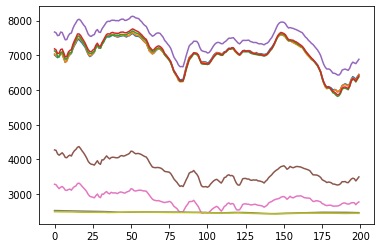

In [22]:
#plt.plot(landsat0[0])